<a href="https://colab.research.google.com/github/manish021996/Zomoto_Restaurant_Clustering_and_Sentiment_Analysis/blob/main/Zomoto_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'>  **Project Name**    -  <font color = 'blue'> **Zomoto_Restaurant_Clustering_and_Sentiment_Analysis**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
#### **Name** - **Manish H Magarde**

# **Project Summary -**

This project centers around restaurant clustering and sentiment analysis of customer reviews on the popular online food delivery platform, Zomato, aiming to extract valuable insights and patterns from a diverse set of data. The project encompasses a series of data processing, engineering, and analytical techniques to achieve its objectives.

Initially, the project kicks off with thorough data cleaning and preprocessing steps. These encompass a comprehensive handling of missing values, outliers, and textual data processing to ensure the quality and accuracy of the dataset.

Subsequently, a strategic approach to feature engineering is executed. This phase encompasses a range of techniques such as feature manipulation, feature selection, data transformation, data scaling, dimensionality reduction and Handling imbalance datasets.

The project then delves into cluster analysis, employing both KMeans and Agglomerative clustering techniques. The determination of the optimal number of clusters is achieved through a combination of the elbow method and silhouette scores.

A significant component of the project revolves around conducting sentiment analysis on the customer reviews. Preliminary results indicate that approximately 82.5% of the sentiments are positive, while the remaining 17.5% reflect negative sentiments.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

https://github.com/manish021996/Zomoto_Restaurant_Clustering_and_Sentiment_Analysis

# **Problem Statement**


**This project aims to mine insights from this data, focusing on customer sentiments and company growth. By analyzing reviews, sentiment trends will be visualized, aiding decisions. Clustering restaurants and leveraging metadata offer further insights, enabling Zomato's enhanced offerings and improving customer experiences.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Dataset Loading

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
restaurant_df = pd.read_csv('/content/drive/MyDrive/Projects/ML - Clustering and Sentimental analysis/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Projects/ML - Clustering and Sentimental analysis/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Restaurant Dataset First Look
restaurant_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
# Review Dataset First Look
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print('No. of rows and columns in restaurant_df: ', restaurant_df.shape)
print('No. of rows and columns in review_df: ', review_df.shape)

No. of rows and columns in restaurant_df:  (105, 6)
No. of rows and columns in review_df:  (10000, 7)


### Dataset Information

In [7]:
# Dataset Info
print('Restaurant df info: ')
print('\n')
print(restaurant_df.info())
print('\n')
print('='*200)
print('\n')
print('Review df info: ')
print('\n')
print(review_df.info())

Restaurant df info: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
None




Review df info: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: in

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print('Duplicate rows in restaurant_df: ', len(restaurant_df[restaurant_df.duplicated]))
print('Duplicate rows in review_df: ', len(review_df[review_df.duplicated]))

Duplicate rows in restaurant_df:  0
Duplicate rows in review_df:  36


In [9]:
# checking duplicate rows in review df
review_df[review_df.duplicated]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print('Mising Values in restaurant_df: ')
print('\n')
print(restaurant_df.isnull().sum())
print('\n')
print('Mising Values in revieww_df: ')
print('\n')
print(review_df.isnull().sum())

Mising Values in restaurant_df: 


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


Mising Values in revieww_df: 


Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Visualizing the missing values in restaurant_df
Axes(0.125,0.11;0.62x0.77)


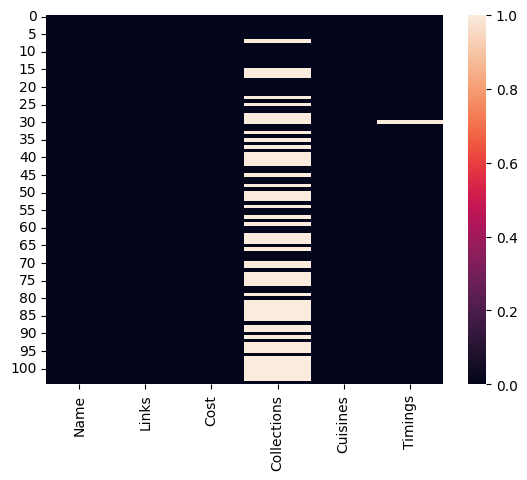

In [11]:
# Visualizing the missing values in Restaurant datasets
print('Visualizing the missing values in restaurant_df')
print(sns.heatmap(restaurant_df.isnull()))

Visualizing the missing values in review_df: 




<Axes: >

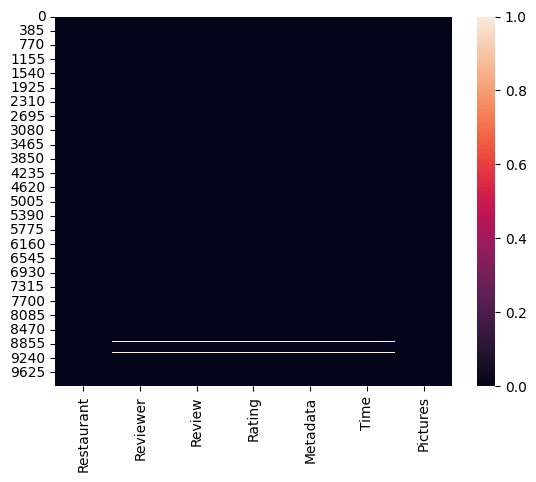

In [12]:
# Visualizing the missing values in Review datasets
print('Visualizing the missing values in review_df: ')
print('\n')
sns.heatmap(review_df.isnull())

### What did you know about your dataset?

#### Restaurant Dataset

* This dataset is related to zomato Restaurant and will use for clustering.
* The dataset consists of 105 rows and 6 columns.
* All variable are object datatype.
* There are 54 and 1 missing or null values in Collection and Timing variable.
* There are no duplicate rows in the dataset.

#### Review Dataset
* This dataset is related to Customer Reviews on Zomato Restaurant and Service.
* The dataset consists of 10000 rows and 7 columns.
* Among 7 columns, 6 columns are object datatype and 1 columns are int datatype.
* Except picture and restaurant feature all others have null values.
* There are 36 duplicate rows in the dataset.


## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print('Column Names in restaurant_df: ', restaurant_df.columns.tolist())
print('\n')
print('Column Names in review_df: ', review_df.columns.to_list())

Column Names in restaurant_df:  ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


Column Names in review_df:  ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [14]:
# restaurant Dataset Describe
restaurant_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [15]:
# Review df describe
review_df.describe(include = 'all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

### **Zomato Restaurant names and Metadata**

**Use this dataset for clustering part**

* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

### **Zomato Restaurant reviews**

**Merge this dataset with Names and Matadata and then use for sentiment analysis part**

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with revie

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
print('No. of unique values present in each variable in Restaurant Df:\n', restaurant_df.nunique())
print('\n')
print('No. of unique values present in each variable in Review Df:\n', review_df.nunique())

No. of unique values present in each variable in Restaurant Df:
 Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64


No. of unique values present in each variable in Review Df:
 Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
restaurant_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [18]:
# removing comma(,) and converting Cost columns from object to int datatype
restaurant_df['Cost'] = restaurant_df['Cost'].str.replace(',', '').astype(int)

In [19]:
# creating a datasets consist all the cuisines with their counts
cuisines_list = restaurant_df['Cuisines'].str.split(', ').explode()
cuisines_data = cuisines_list.value_counts().reset_index().rename(columns = {'index':'Cuisines', 'Cuisines':'count' })

In [20]:
cuisines_data.head()

Cuisines  count
0  North Indian     61
1       Chinese     43
2   Continental     21
3       Biryani     16
4     Fast Food     15

In [21]:
# creating a datasets consist all the collections with their counts
collection_list = restaurant_df['Collections'].str.split(', ').explode()
collection_data = collection_list.value_counts().reset_index().rename(columns = {'index':'Collections', 'Collections':'Counts'})

In [22]:
collection_data.head()

Collections  Counts
0                                Great Buffets      11
1  Food Hygiene Rated Restaurants in Hyderabad       8
2                       Live Sports Screenings       7
3                          Hyderabad's Hottest       7
4                          Corporate Favorites       6

In [23]:
# # creating a datasets consist of cost of all the restaurant in desecending
cost_df = restaurant_df.groupby('Name')['Cost'].max().reset_index().sort_values('Cost', ascending = False)
cost_df

Name  Cost
23               Collage - Hyatt Hyderabad Gachibowli  2800
35                   Feast - Sheraton Hyderabad Hotel  2500
0                                   10 Downing Street  1900
48  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
20            Cascade - Radisson Hyderabad Hitec City  1800
..                                                ...   ...
62                                      Momos Delight   200
43                                 Hunger Maggi Point   200
50                                          KS Bakers   200
7                                                Amul   150
61                                Mohammedia Shawarma   150

[105 rows x 2 columns]

In [24]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [25]:
# droping all the duplicate values of review datasets.
review_df.drop_duplicates(inplace = True)

In [26]:
# converting Time column datatype into datetime
review_df['Time'] = pd.to_datetime(review_df['Time'])

# Extracting 3 new columns from Time columns
review_df['Review_year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_months'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Review_hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [27]:
# checking all the unique value of Rating columns
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [28]:
# replacing Like with median of column
review_df['Rating'] = review_df['Rating'].replace('Like', review_df[review_df['Rating'] != 'Like']['Rating'].astype(float).median())

In [29]:
# converting all the rating column datatype into float
review_df['Rating'] = review_df['Rating'].astype('float')

In [30]:
# converting Reviewer_total_review and Reviewer_total_followers columns datatype into float
review_df['Reviewer_total_review'] = review_df['Metadata'].str.split(' ').str[0].astype('float')
review_df['Reviewer_total_followers'] = review_df['Metadata'].str.split(' ').str[3].astype('float')

In [31]:
# creating a datasets containing information about all the Reviewer
reviwer_data =  review_df.groupby('Reviewer')[['Reviewer_total_review','Reviewer_total_followers']].sum().reset_index().sort_values('Reviewer_total_review', ascending = False)
reviwer_data

Reviewer  Reviewer_total_review  Reviewer_total_followers
772         Anvesh Chowdary                 3093.0                    4962.0
4396                  Raghu                 2658.0                    6096.0
3858            Parijat Ray                 1898.0                    4329.0
5238      Sambhangi Sandeep                 1638.0                    4816.0
1952         Gourmet Hunter                 1617.0                    2849.0
...                     ...                    ...                       ...
2707                  Komal                    0.0                       1.0
2719    Kotaru Sydeswararao                    0.0                       0.0
3977           Poonam Swami                    0.0                       0.0
6962  Varaprasad Yarlagadda                    0.0                       1.0
3107                  Manju                    0.0                       0.0

[7446 rows x 3 columns]

In [32]:
# creating a datatype of Restaurant with there cost
price_by_restaurant = restaurant_df.groupby('Name')['Cost'].max().reset_index().sort_values('Cost', ascending = False)
price_by_restaurant

Name  Cost
23               Collage - Hyatt Hyderabad Gachibowli  2800
35                   Feast - Sheraton Hyderabad Hotel  2500
0                                   10 Downing Street  1900
48  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
20            Cascade - Radisson Hyderabad Hitec City  1800
..                                                ...   ...
62                                      Momos Delight   200
43                                 Hunger Maggi Point   200
50                                          KS Bakers   200
7                                                Amul   150
61                                Mohammedia Shawarma   150

[105 rows x 2 columns]

In [33]:
# converting Name into Restaurant
restaurant_df = restaurant_df.rename(columns = {'Name':'Restaurant'})

In [34]:
# creating a dataset consist of conts of reviews in each months
Review_months = review_df['Review_months'].value_counts().reset_index().rename(columns = {'index':'Months', 'Review_months':'Counts'}).sort_values('Months')
Review_months

Months  Counts
6      1.0     652
4      2.0     719
3      3.0    1065
2      4.0    1247
0      5.0    1542
11     6.0     292
1      7.0    1331
5      8.0     677
7      9.0     645
8     10.0     629
10    11.0     569
9     12.0     594

In [35]:
# creating a dataset consist of conts of reviews in each hours
Review_hours = review_df['Review_hour'].value_counts().reset_index().rename(columns = {'index':'Hours', 'Review_hour':'Counts'}).sort_values('Hours')
Review_hours

Hours  Counts
9     0.0     509
13    1.0     313
17    2.0     167
19    3.0     102
21    4.0      55
23    5.0      39
22    6.0      44
20    7.0      78
18    8.0     134
16    9.0     171
15   10.0     229
14   11.0     308
11   12.0     460
6    13.0     580
3    14.0     776
5    15.0     645
7    16.0     549
10   17.0     480
12   18.0     438
8    19.0     522
4    20.0     714
1    21.0     877
0    22.0     968
2    23.0     804

In [36]:
# Merging Restaurant Datasets and Review Datasets
merged_df = restaurant_df.merge(review_df, on = 'Restaurant')
merged_df.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  Review_year  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0       2019.0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0       2019.0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0       2019.0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0       2019.0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0       2019.0   

   Review_months  Review_hour  Reviewer_total_review  Reviewer_total_followers  
0            5.0         15.0                    1.0                       2.0  
1            5.0         14.0                    3.0                       2.0  
2            5.0         22.0                    2.0                       3.0  
3            5.0         22.0                    1.0                       1.0  
4            5.0         21.0                    3.0                       2.0

In [37]:
# Creating a datsets consist of avg rating all all restaurant with there price
rating_by_price = merged_df.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price'}).sort_values('Rating', ascending = False)

In [38]:
rating_by_price.head()

Restaurant  Rating   Price
3        AB's - Absolute Barbecues    4.88  1500.0
11                          B-Dubs    4.81  1600.0
2   3B's - Buddies, Bar & Barbecue    4.76  1100.0
67                        Paradise    4.70   800.0
35                        Flechazo    4.66  1300.0

### What all manipulations have you done and insights you found?

#### Restaurant Dataset

* Converting Cost columns datatype into int.
* Create some subdatasets for EDA which are : cuisines_data, collection_data, cost_df

#### Review Dataset

* Convert Time column datatype into datetime and Rating column datatype into float.
* Extract 3 new columns from Time columns which are Review_year, Review_months, Review_hour.
* Drop the duplicate rows present in datasets.
* Extract 2 more new columns from Metadata which are Reviewer_total_review and Reviewer_total_followers.
* Create some new subdatasets for EDA which are reviewr_data, price_by_restaurant, Review_months, Review_hours.
* convert Name column name into Restaurant.

#### Merge Datasets

* create a new dataset merge_df by merging both the datasts.
* Create a new subdatset rating_by_price.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

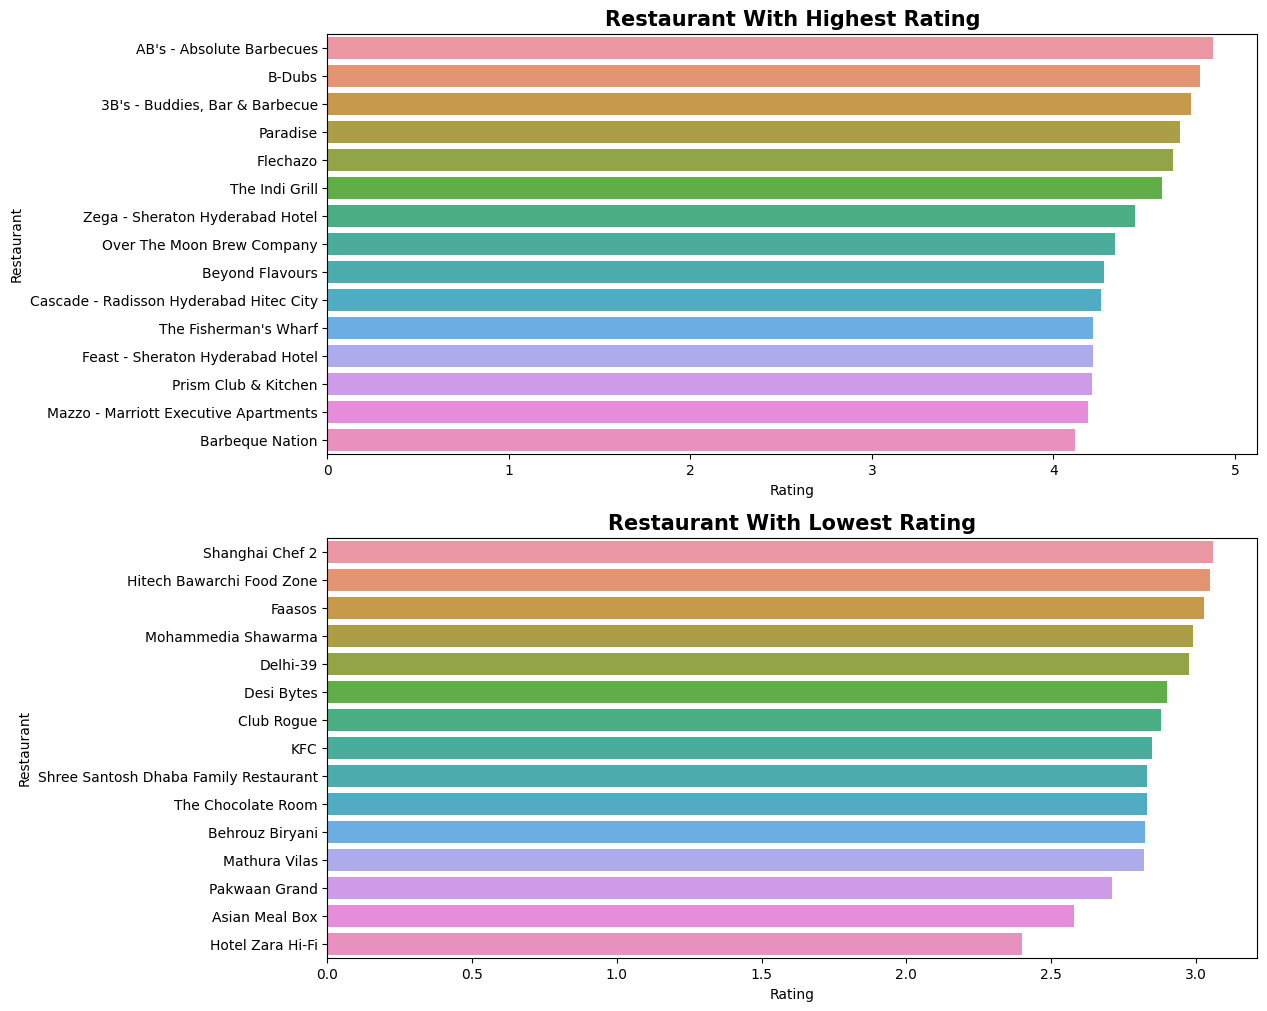

In [39]:
# barchart representing top and bottom 10 restaurant wrt rating.
plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
sns.barplot(x= 'Rating', y = 'Restaurant', data = rating_by_price.head(15))
plt.title('Restaurant With Highest Rating', fontsize = 15, weight='bold')

plt.subplot(2,1,2)
sns.barplot(x= 'Rating', y = 'Restaurant', data = rating_by_price.tail(15))
plt.title('Restaurant With Lowest Rating', fontsize = 15, weight='bold')
plt.show()

* **AB's - Absolute Barbecues and B-Dubs** are the Restaurant with Highest Rating.
* **Shanghai Chef 2 and Hitech Bawarchi Food Zone** are the restaurant with Lowest Rating.

#### Chart - 2

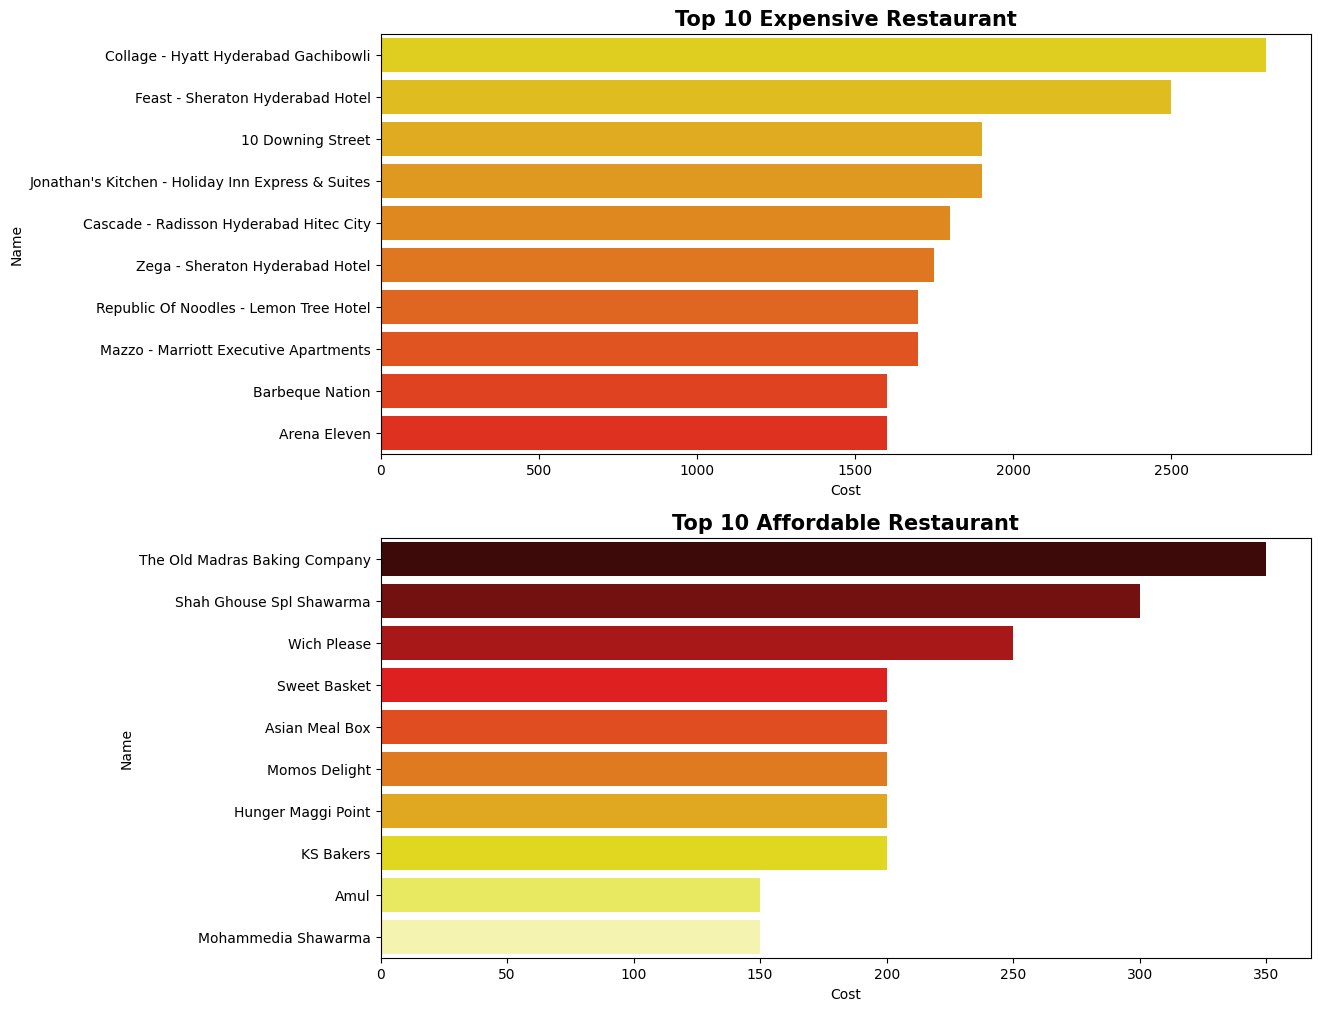

In [40]:
# barchart representing top and bottom 10 restaurant wrt cost
plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
sns.barplot(data = price_by_restaurant.head(10), x = 'Cost', y = 'Name',palette ="autumn_r")
plt.title('Top 10 Expensive Restaurant',fontsize=15, weight='bold')

plt.subplot(2,1,2)
sns.barplot(data = price_by_restaurant.tail(10), x = 'Cost', y ='Name', palette ="hot")
plt.title("Top 10 Affordable Restaurant",fontsize=15, weight='bold')
plt.show()


* **Collage - Hyatt hyderabad Gachibowli, Feast-Sheraton Hyderabad Hotel and 10 Dowing street** are the top 3 Expensive restaurant.
* **Mohammedia Shawarma, Amul and KS Bakers** are most Affordable Restaurant.

#### Chart - 3

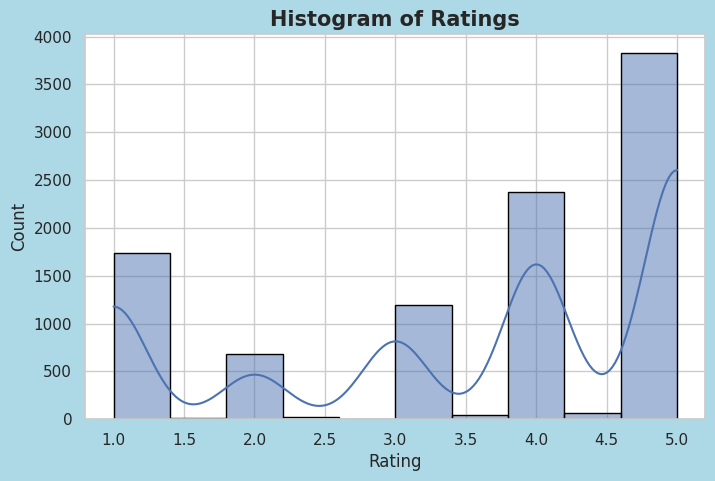

In [41]:
# checking the distribution of Rating columns values through Histogram
fig = plt.figure(figsize=(8,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.histplot(data = review_df, x = 'Rating', bins = 10, kde = True, edgecolor='black' )
plt.title('Histogram of Ratings', weight = 'bold', fontsize = 15)
plt.show()

* **Majority of Customers has given a rating of 4 to 5** to the Zomato Restaurant and Services.

#### Chart - 4

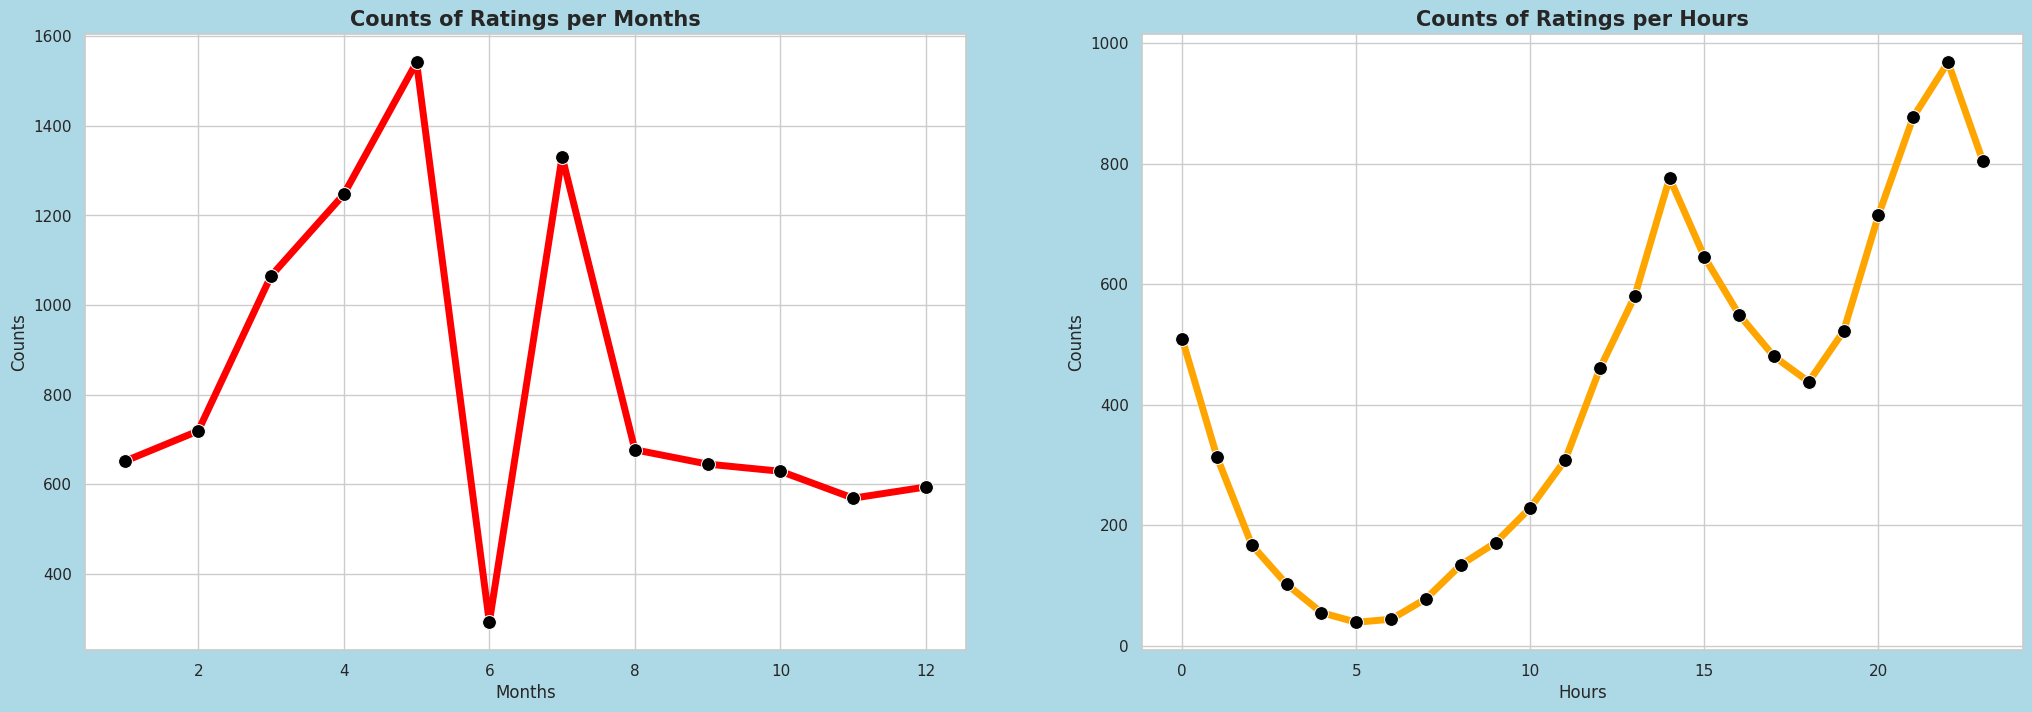

In [42]:
# line plot representing the counts of review per months and hours
fig = plt.figure(figsize=(25,8))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")

plt.subplot(1,2,1)
sns.lineplot(data = Review_months, x = 'Months', y = 'Counts',linewidth = 5, marker="o", markersize=10, markerfacecolor = 'black', color = 'red')
plt.title('Counts of Ratings per Months', weight = 'bold', fontsize = 15)

plt.subplot(1,2,2)
sns.lineplot(data = Review_hours, x = 'Hours', y = 'Counts', linewidth = 5, marker="o", markersize=10, markerfacecolor = 'black', color = 'Orange')
plt.title('Counts of Ratings per Hours', weight = 'bold', fontsize = 15)

plt.show()

* **May and July months have highest numbers of reviews** which tells more engagements of customers in this months.
* **June month have less engagement**, having less counts of reviews.
* **Highest number of review are at 11 pm**, which shows **highest engagement of customers at night**.

#### Chart - 5

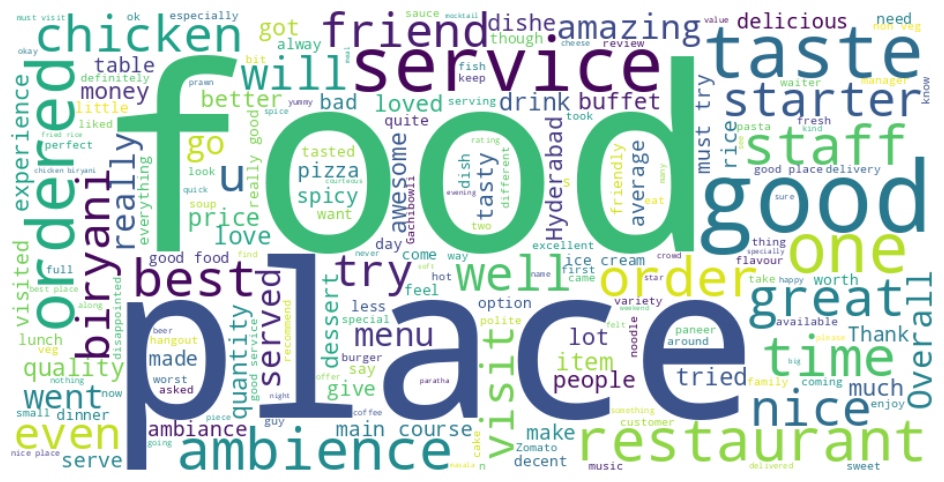

In [43]:
# plotting a wordcloud for the reviews.
review_df['Review'] = review_df['Review'].astype(str).replace('nan', '')

# Storing all review in the form of text
text = " ".join(name for name in review_df['Review'])

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', contour_width=2, contour_color='blue').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(18, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Most of the customers had mentioned **food, place, good, service, ordered, restaurant and taste** in their reviews.

#### Chart - 6

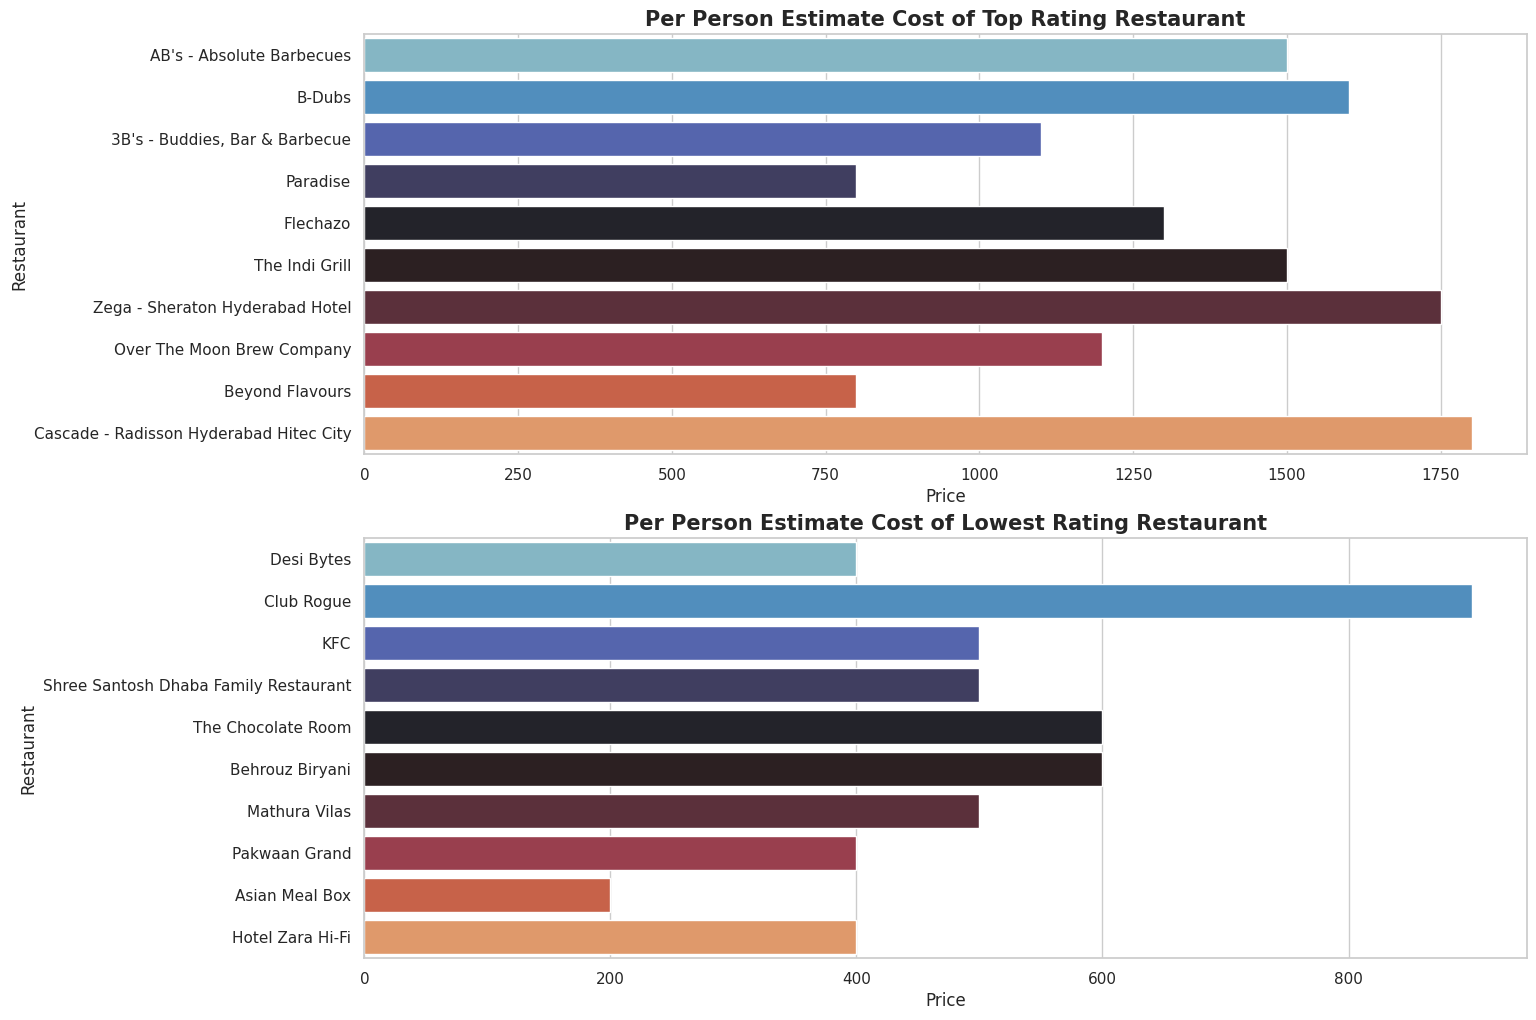

In [44]:
# barplot for representing top and bottom 10 Restaurant wrt to rating and per person cost
plt.figure(figsize = (15,12))
plt.subplot(2,1,1)
sns.barplot(data = rating_by_price.head(10), y= 'Restaurant', x = 'Price', palette = 'icefire').set_title('Per Person Estimate Cost of Top Rating Restaurant', weight = 'bold', fontsize =15)

plt.subplot(2,1,2)
sns.barplot(data = rating_by_price.tail(10), y= 'Restaurant', x = 'Price', palette = 'icefire').set_title('Per Person Estimate Cost of Lowest Rating Restaurant', weight = 'bold', fontsize =15)

plt.show()

* Price point for **high rated hotel AB's= Absolute Barbecues is 1500** and price point for **low rated restaurant Hotel Zara Hi-Fi is 400**.

#### Chart - 7

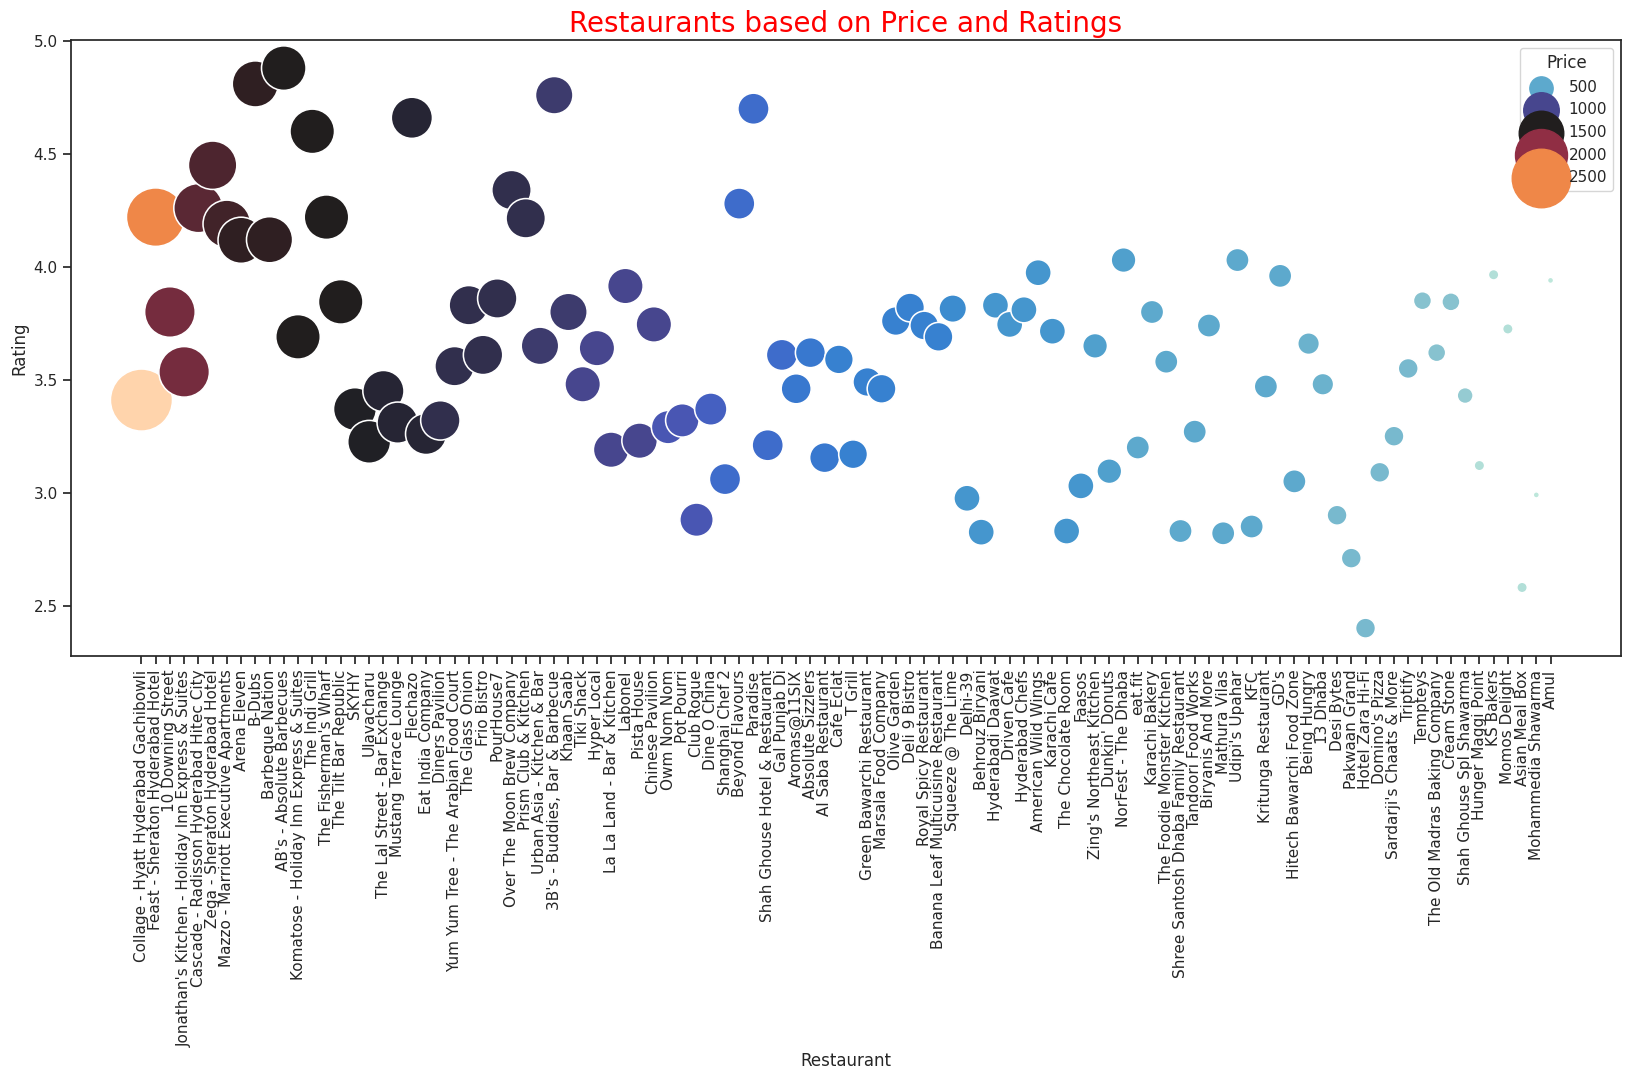

In [45]:
# Scatterplot on rating based on price and hotel

plt.figure(figsize = (20,8))
sns.set_style("ticks")
data1 = rating_by_price.sort_values('Price', ascending = False)

sns.scatterplot(data= data1, x= "Restaurant", y="Rating", size="Price",
                hue = 'Price',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()


#### Chart - 8

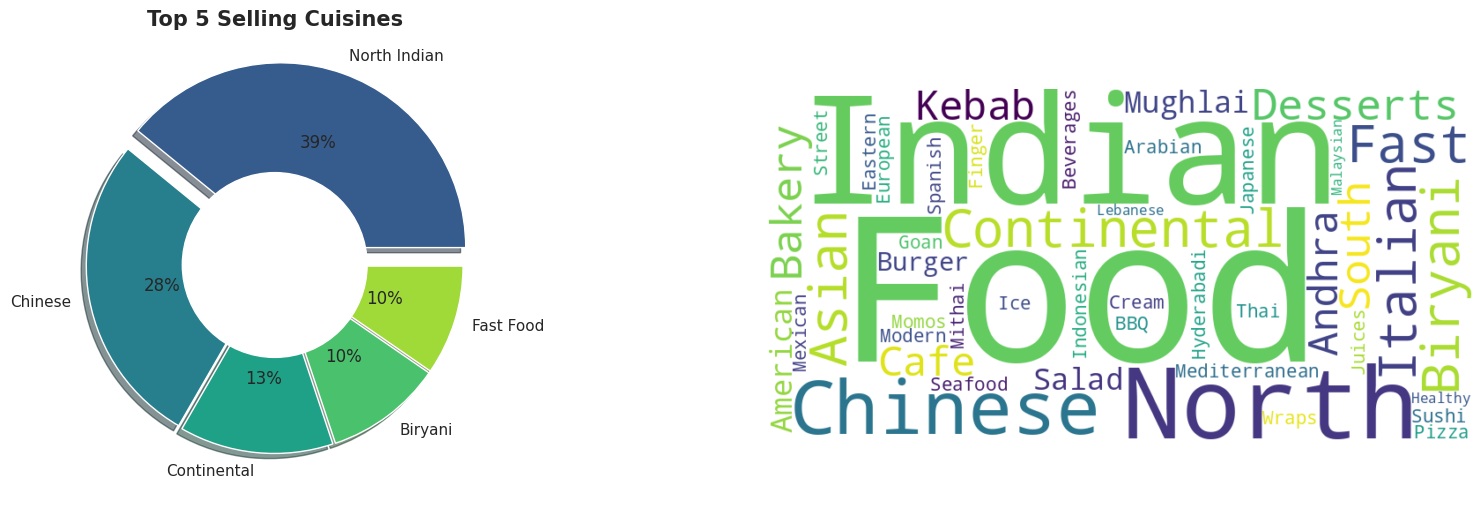

In [46]:
# pie chart representing top 5 selling cuisines and wordcloud for cuisines
data2 = cuisines_data['count'][:5]

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
color = sns.color_palette('viridis')[1:6]
plt.pie(data2, autopct='%.0f%%',shadow=True, labels = cuisines_data['Cuisines'][:5], colors = color, explode = [0.1,0.02,0.02,0.02,0.02])
plt.title('Top 5 Selling Cuisines', fontsize = 15, weight = 'bold')

# creating white circle inside pie chhart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(center_circle)


plt.subplot(1,2,2)
# Storing all Cuisines in the form of text
text = " ".join(name for name in cuisines_data['Cuisines'])

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', contour_width=2, contour_color='blue').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* **North India and Chinese** are most selling Cuisines.

#### Chart - 9

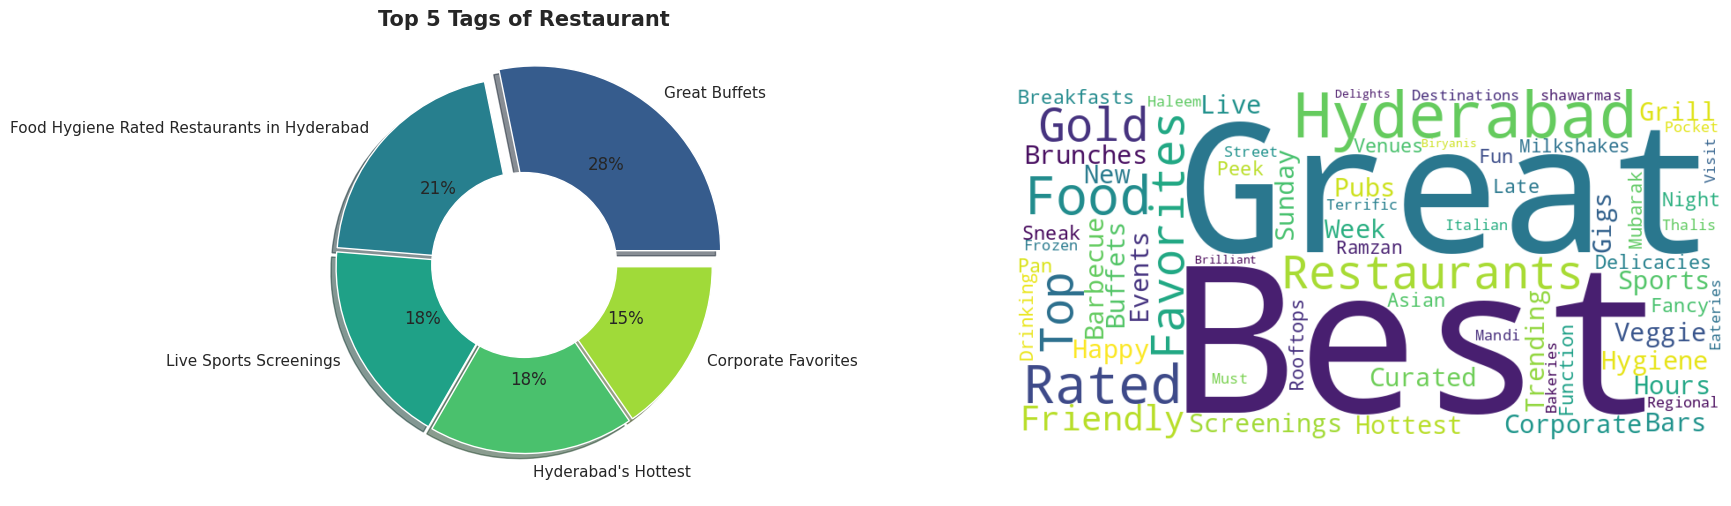

In [47]:
# pie chart representing top 5 tag of restaurant and wordcloud for collection
data3 = collection_data['Counts'][:5]

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
color = sns.color_palette('viridis')[1:6]
plt.pie(data3, autopct='%.0f%%',shadow=True, labels = collection_data['Collections'][:5], colors = color, explode = [0.1,0.02,0.02,0.02,0.02])
plt.title('Top 5 Tags of Restaurant', fontsize = 15, weight = 'bold')

# creating white circle inside pie chhart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(center_circle)


plt.subplot(1,2,2)
# Storing all Cuisines in the form of text
text = " ".join(name for name in collection_data['Collections'])

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', contour_width=2, contour_color='blue').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* **Great Buffets is the most frequently used tags** and other tags like great, best, north, Hyderabad is also used in large quantity.

#### Chart - 10

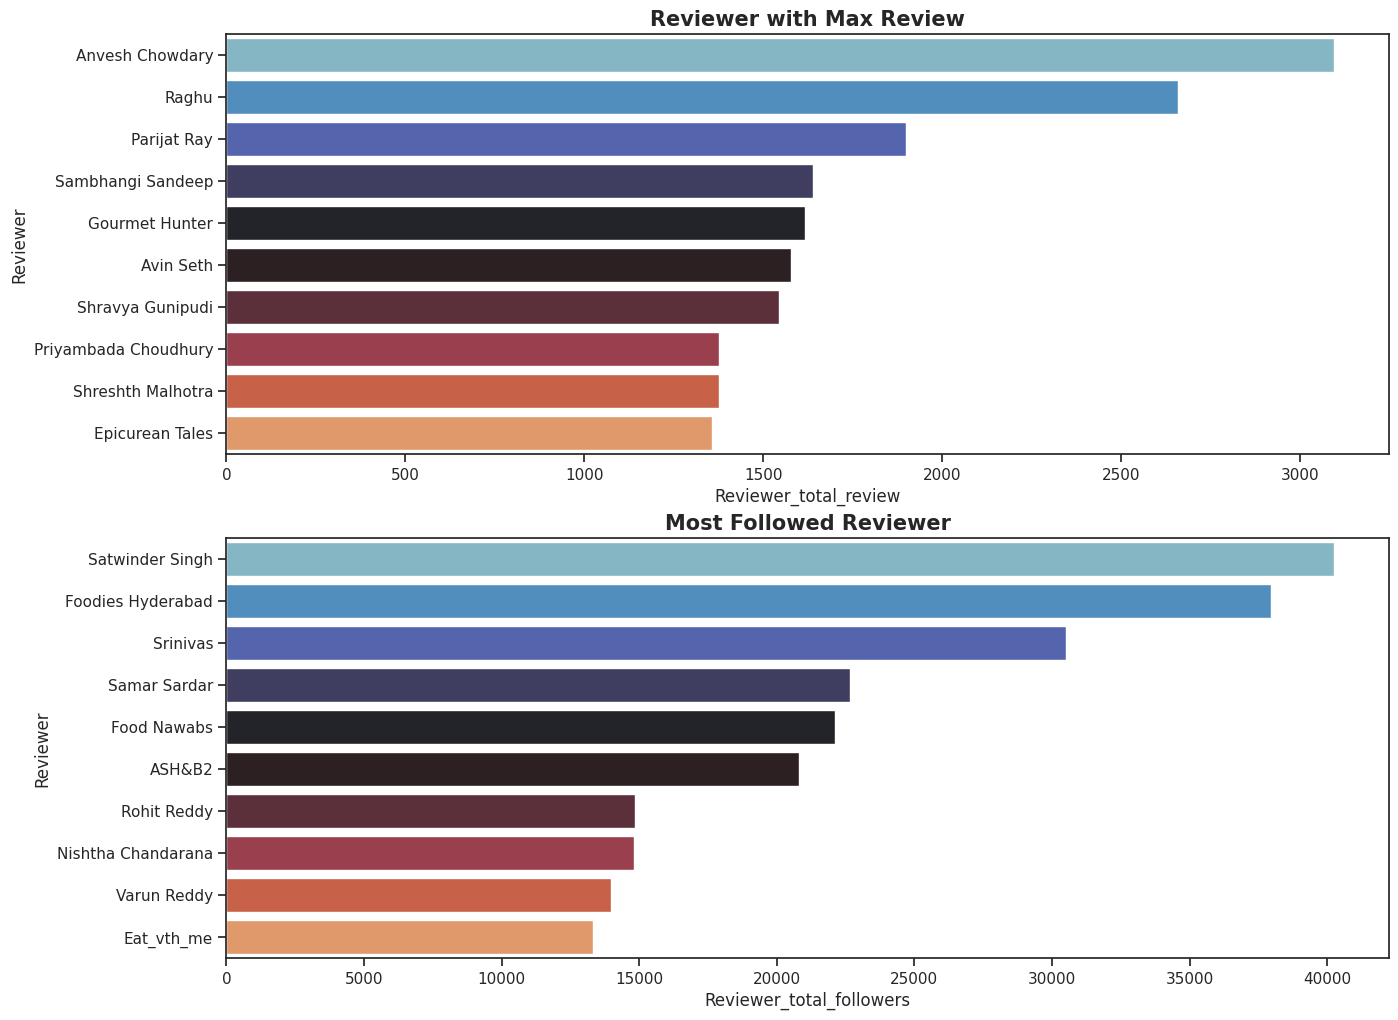

In [48]:
# barplot for representing Name of top 10 Reviewer wrt no. of there review and no. of follower.
data4 = reviwer_data.sort_values('Reviewer_total_followers', ascending = False)
plt.figure(figsize = (15,12))

plt.subplot(2,1,1)
sns.barplot(data = reviwer_data.head(10), x= 'Reviewer_total_review', y = 'Reviewer', palette = 'icefire').set_title('Reviewer with Max Review', fontsize = 15, weight = 'bold')

plt.subplot(2,1,2)
sns.barplot(data = data4.head(10), x= 'Reviewer_total_followers', y = 'Reviewer', palette = 'icefire').set_title('Most Followed Reviewer', fontsize = 15, weight = 'bold')

plt.show()



* Anvesh Chowdary has giving highesh number of reviews around 3000 followed by Raghu.
* Satwinder Singh has a highest no. of followers followed by Foodies Hyderabad.

#### Chart - 11

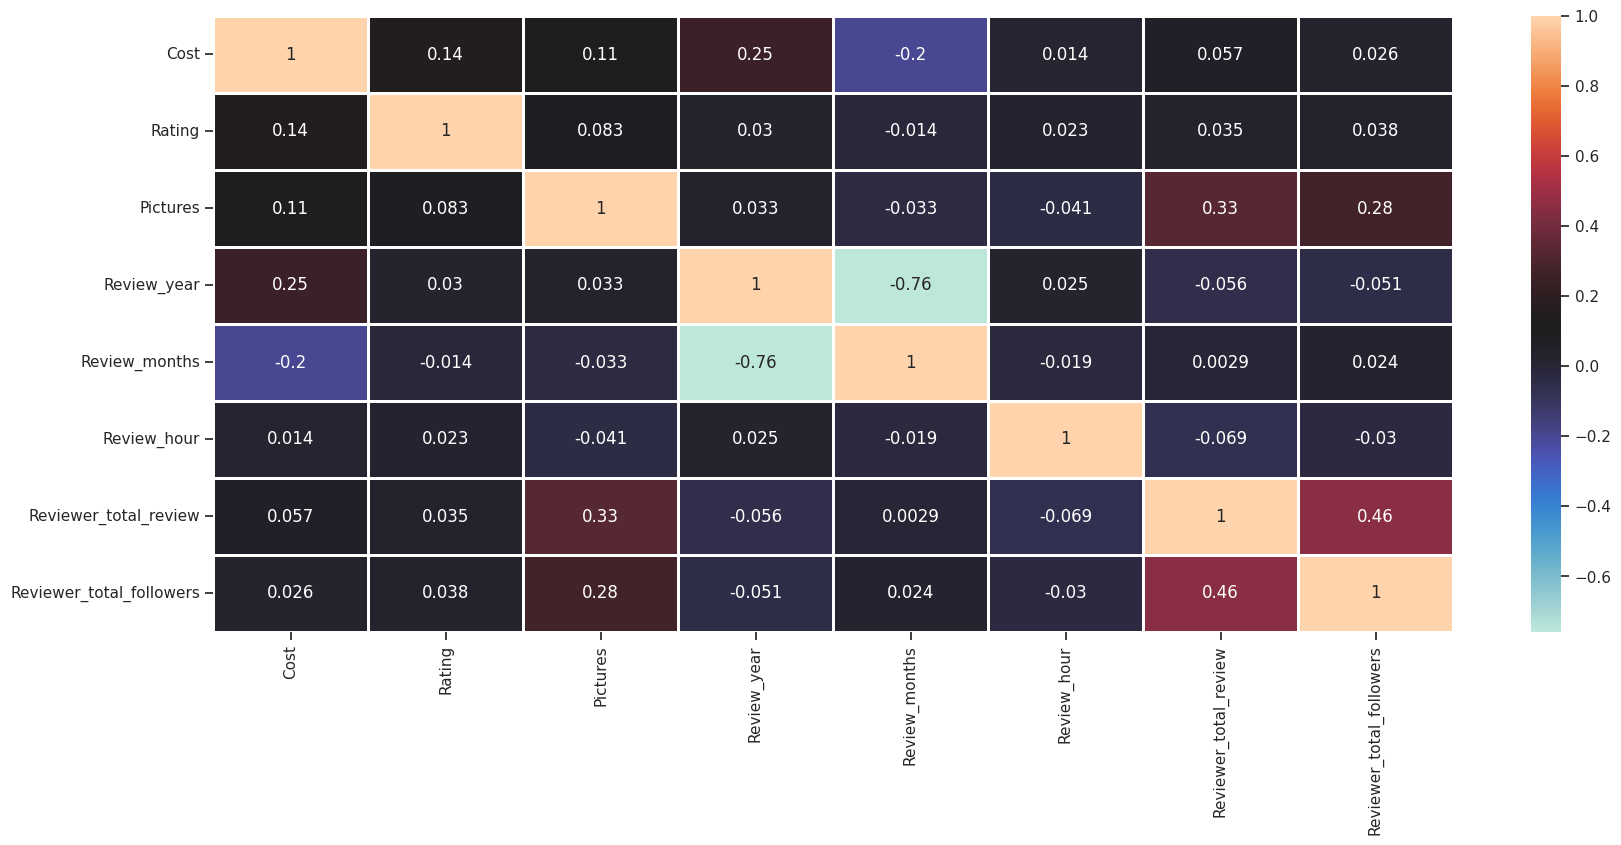

In [49]:
# correlation heatmap
plt.figure(figsize = (20,8))
sns.heatmap(merged_df.corr(), annot=True, cmap = 'icefire', linewidths = 2)
plt.show()

* From the above correlation heatmap, it can be depicted that few features are correlated, like **reviewer total review is 46% positivily correlated to reviewer follower and again reviewer total review is 33% positively correlated to pictures**.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#### 1. Restaurants that offer a wider variety of cuisines will have a higher rating.
#### 2. The cost of a restaurant is positively correlated with the rating it receives.

### Hypothetical Statement - 1 : Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : There is no relationship between variety of cuisines and rating they receives. (H0: 𝛽1 = 0)
* Alternate Hypothesis : The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽1 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis : There is no relationship between variety of cuisines and rating they receives.")
else:
    print("Fail to reject Null Hypothesis : The variety of cuisines offered by a restaurant has a positive effect on its rating. ")


Reject Null Hypothesis : There is no relationship between variety of cuisines and rating they receives.


##### Which statistical test have you done to obtain P-Value?

I have used chi-squared test to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

### Hypothetical Statement - 2 :  The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽2 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽2 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

In [52]:
# creating copy of datasets
rest_df = restaurant_df.copy()
rev_df = review_df.copy()
print(rest_df.shape)
print(rev_df.shape)

(105, 6)
(9964, 12)


### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation
print(rest_df.isnull().sum())
print('='*50)
print('\n')
print(rev_df.isnull().sum())

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


Restaurant                     0
Reviewer                       2
Review                         0
Rating                         2
Metadata                       2
Time                           2
Pictures                       0
Review_year                    2
Review_months                  2
Review_hour                    2
Reviewer_total_review          2
Reviewer_total_followers    1580
dtype: int64


In [54]:
# dropping collection columns as it has 51% missing values
rest_df.drop(columns = 'Collections',inplace = True)

In [55]:
# checking null value present in Timing column
rest_df[rest_df['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

                              Cuisines Timings  
30  Andhra, South Indian, North Indian     NaN

In [56]:
# replacing null value with mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0], inplace =True)

In [57]:
# checking whether all null values of columns [Reviewer, Rating, Metadata, Time, Rating_year, Rating_months,
# Rating_hour, Reviewer_total_review, Reviewer_total_followers] are in same rows or not
rev_df[rev_df['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN            NaN      NaN  NaT         0   
9085         Arena Eleven      NaN            NaN      NaN  NaT         0   

      Review_year  Review_months  Review_hour  Reviewer_total_review  \
8777          NaN            NaN          NaN                    NaN   
9085          NaN            NaN          NaN                    NaN   

      Reviewer_total_followers  
8777                       NaN  
9085                       NaN

In [58]:
# droppping the above 2 rows
rev_df.dropna(subset = ['Reviewer'], inplace = True)

In [59]:
# checking null value in Reviewer_total_followers
rev_df[rev_df['Reviewer_total_followers'].isnull()]

Restaurant          Reviewer  \
5      Beyond Flavours     Nagabhavani K   
6      Beyond Flavours   Jamuna Bhuwalka   
7      Beyond Flavours         Sandhya S   
14     Beyond Flavours     Kankaria.ritu   
24     Beyond Flavours     Amritap Datta   
...                ...               ...   
9912  Chinese Pavilion          Anil Rao   
9918  Chinese Pavilion       Ajay Munjal   
9933  Chinese Pavilion   Korak Mukherjee   
9940  Chinese Pavilion     Anubinda Dash   
9948  Chinese Pavilion  Krishna Peddinti   

                                                 Review  Rating    Metadata  \
5     Ambiance is good, service is good, food is aPr...     5.0    1 Review   
6     Its a very nice place, ambience is different, ...     5.0    1 Review   
7     Well after reading so many reviews finally vis...     4.0    1 Review   
14    We ordered corn cheese balls, manchow soup and...     1.0    1 Review   
24    Excellent experience, mouthwatering food, good...     5.0    1 Review   
...                                                 ...     ...         ...   
9912  The tofu with mushrooms was absolutely wonderf...     5.0   9 Reviews   
9918  The food is delicious. Service is excellent. I...     5.0   4 Reviews   
9933  I was here last night with 2 of my friends. We...     1.0   9 Reviews   
9940  The food was amazing. Do not forget to try 'Mo...     4.5  11 Reviews   
9948  Some restaurant's have figured their identity....     5.0   3 Reviews   

                    Time  Pictures  Review_year  Review_months  Review_hour  \
5    2019-05-24 15:22:00         0       2019.0            5.0         15.0   
6    2019-05-24 01:02:00         0       2019.0            5.0          1.0   
7    2019-05-23 15:01:00         0       2019.0            5.0         15.0   
14   2019-05-22 21:19:00         0       2019.0            5.0         21.0   
24   2019-05-20 23:33:00         0       2019.0            5.0         23.0   
...                  ...       ...          ...            ...          ...   
9912 2019-04-04 02:15:00         0       2019.0            4.0          2.0   
9918 2019-02-16 13:56:00         0       2019.0            2.0         13.0   
9933 2018-05-29 16:02:00         1       2018.0            5.0         16.0   
9940 2018-03-02 19:54:00        10       2018.0            3.0         19.0   
9948 2017-10-01 05:21:00         0       2017.0           10.0          5.0   

      Reviewer_total_review  Reviewer_total_followers  
5                       1.0                       NaN  
6                       1.0                       NaN  
7                       1.0                       NaN  
14                      1.0                       NaN  
24                      1.0                       NaN  
...                     ...                       ...  
9912                    9.0                       NaN  
9918                    4.0                       NaN  
9933                    9.0                       NaN  
9940                   11.0                       NaN  
9948                    3.0                       NaN  

[1578 rows x 12 columns]

In [60]:
# filling null value with 0
rev_df['Reviewer_total_followers'].fillna(0, inplace=True)

In [61]:
# checking null value after handling it
print(rest_df.isnull().sum())
print('\n')
print('='*50)
print('\n')
print(rev_df.isnull().sum()/len(merged_df) * 100)

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64




Restaurant                  0.0
Reviewer                    0.0
Review                      0.0
Rating                      0.0
Metadata                    0.0
Time                        0.0
Pictures                    0.0
Review_year                 0.0
Review_months               0.0
Review_hour                 0.0
Reviewer_total_review       0.0
Reviewer_total_followers    0.0
dtype: float64


### 2. Handling Outliers

In [62]:
# Checking for outliers
rest_df.describe()

Cost
count   105.000000
mean    861.428571
std     510.149730
min     150.000000
25%     500.000000
50%     700.000000
75%    1200.000000
max    2800.000000

In [63]:
rev_df.describe()

Rating     Pictures  Review_year  Review_months  Review_hour  \
count  9962.000000  9962.000000  9962.000000    9962.000000  9962.000000   
mean      3.601084     0.751456  2018.452118       6.017868    15.187412   
std       1.483392     2.574863     0.562494       3.159464     6.579646   
min       1.000000     0.000000  2016.000000       1.000000     0.000000   
25%       3.000000     0.000000  2018.000000       4.000000    12.000000   
50%       4.000000     0.000000  2018.000000       5.000000    16.000000   
75%       5.000000     0.000000  2019.000000       8.000000    21.000000   
max       5.000000    64.000000  2019.000000      12.000000    23.000000   

       Reviewer_total_review  Reviewer_total_followers  
count            9962.000000               9962.000000  
mean               23.990865                162.994178  
std                50.615027                619.950232  
min                 0.000000                  0.000000  
25%                 1.000000                  1.000000  
50%                 4.000000                  7.000000  
75%                22.000000                 63.000000  
max              1031.000000              13410.000000

In [64]:
# Checking the skewness and Kurtosis value
print("Skewness - Cost: %f" % rest_df['Cost'].skew())
print("Kurtosis - Cost: %f" % rest_df['Cost'].kurt())
print("Skewness - Reviewer_total_followers: %f" % rev_df['Reviewer_total_followers'].skew())
print("Kurtosis - Reviewer_total_followers: %f" % rev_df['Reviewer_total_followers'].kurt())

Skewness - Cost: 1.143450
Kurtosis - Cost: 1.534478
Skewness - Reviewer_total_followers: 10.093197
Kurtosis - Reviewer_total_followers: 151.327748


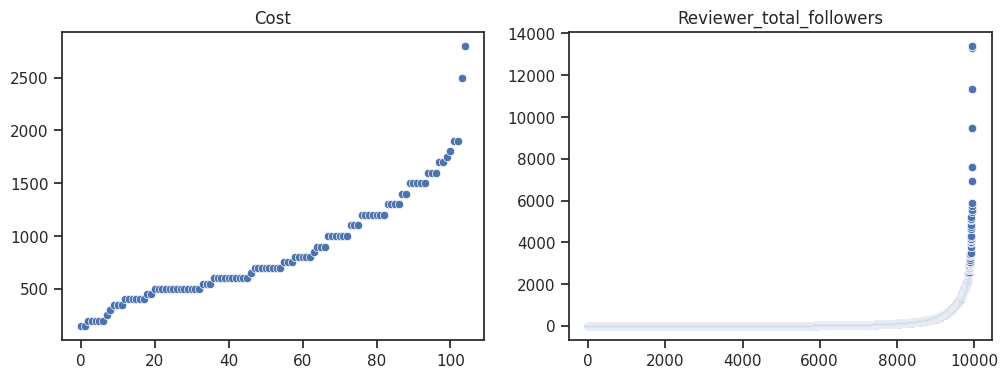

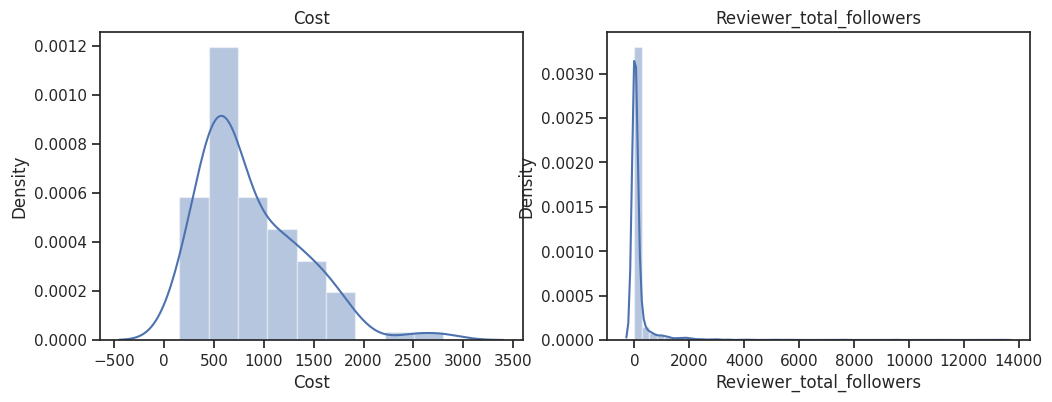

In [65]:
# Visualizing outliers and data distribution in cost and Reviewer_total_followers
outlier_list = ['Cost','Reviewer_total_followers']
plt.figure(figsize = (12,4))
for n,i in enumerate(outlier_list):
  plt.subplot(1,2,n+1)
  if i == 'Cost':
    sns.scatterplot(x = range(rest_df.shape[0]), y = np.sort(rest_df[i].values))
    plt.title(i)
  else:
    sns.scatterplot(x = range(rev_df.shape[0]), y = np.sort(rev_df[i].values))
    plt.title(i)

print('\n')

plt.figure(figsize = (12,4))
for n,i in enumerate(outlier_list):
  plt.subplot(1,2,n+1)
  if i == 'Cost':
    sns.distplot(rest_df[i])
    plt.title(i)
  else:
    sns.distplot(rev_df[i])
    plt.title(i)

In [66]:
# Handling outliers with IQR
for col in outlier_list:
  # Using IQR method to define the range of inliners:
  if col == 'Cost':
    q1, q3, median = rest_df[col].quantile([0.25,0.75,0.5])
    lower_limit = q1 - 1.5*(q3-q1)
    upper_limit = q3 + 1.5*(q3-q1)

    # Replacing Outliers with median value
    rest_df[col] = np.where(rest_df[col] > upper_limit, upper_limit,np.where(
                          rest_df[col] < lower_limit,lower_limit,rest_df[col]))
  else:
    q1, q3, median = rev_df[col].quantile([0.25,0.75,0.5])
    lower_limit = q1 - 1.5*(q3-q1)
    upper_limit = q3 + 1.5*(q3-q1)

    # Replacing Outliers with median value
    rev_df[col] = np.where(rev_df[col] > upper_limit, upper_limit,np.where(
                          rev_df[col] < lower_limit,lower_limit,rev_df[col]))

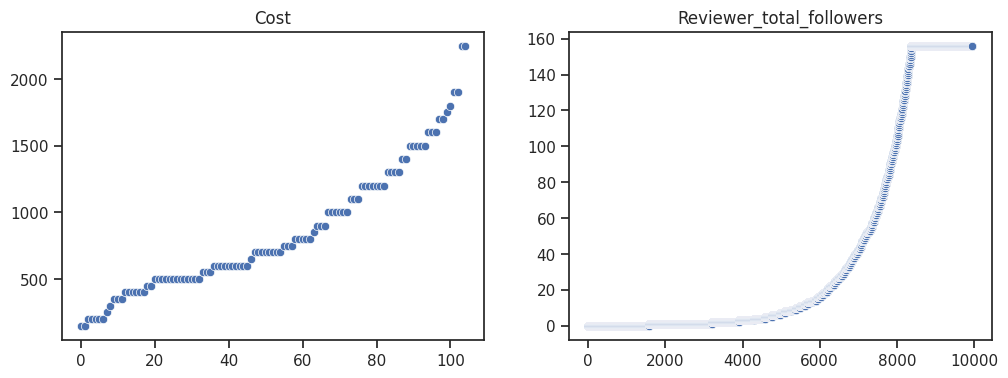

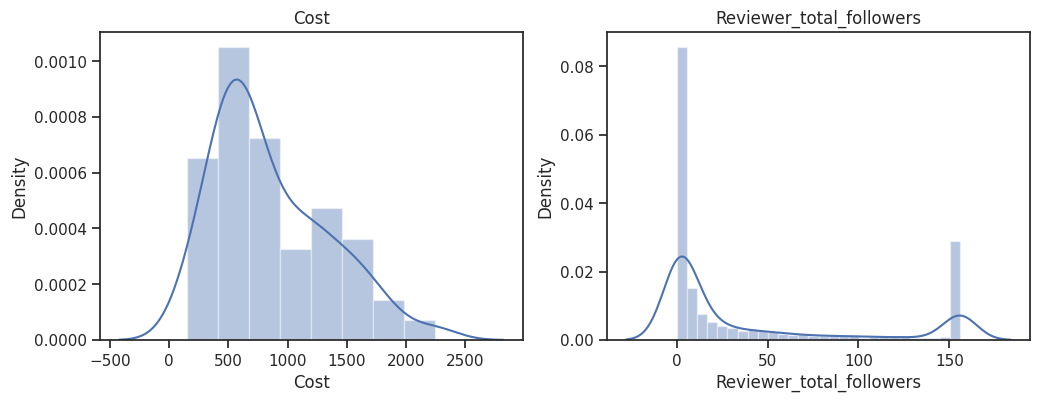

In [67]:
# checking the distribution of data after removing outliers
outlier_list = ['Cost','Reviewer_total_followers']
plt.figure(figsize = (12,4))
for n,i in enumerate(outlier_list):
  plt.subplot(1,2,n+1)
  if i == 'Cost':
    sns.scatterplot(x = range(rest_df.shape[0]), y = np.sort(rest_df[i].values))
    plt.title(i)
  else:
    sns.scatterplot(x = range(rev_df.shape[0]), y = np.sort(rev_df[i].values))
    plt.title(i)

print('\n')

plt.figure(figsize = (12,4))
for n,i in enumerate(outlier_list):
  plt.subplot(1,2,n+1)
  if i == 'Cost':
    sns.distplot(rest_df[i])
    plt.title(i)
  else:
    sns.distplot(rev_df[i])
    plt.title(i)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [68]:
# creating new dataframe
Rating_df = rev_df.groupby('Restaurant')['Rating'].mean().reset_index().rename(columns={'Rating':'Avg Rating'})
Rating_df

Restaurant  Avg Rating
0                       10 Downing Street        3.80
1                                13 Dhaba        3.48
2          3B's - Buddies, Bar & Barbecue        4.76
3               AB's - Absolute Barbecues        4.88
4                       Absolute Sizzlers        3.62
..                                    ...         ...
95             Urban Asia - Kitchen & Bar        3.65
96  Yum Yum Tree - The Arabian Food Court        3.56
97        Zega - Sheraton Hyderabad Hotel        4.45
98               Zing's Northeast Kitchen        3.65
99                                eat.fit        3.20

[100 rows x 2 columns]

In [69]:
# merging Ratinng_df with rest_df
cluster_df = rest_df.merge(Rating_df, on='Restaurant')
cluster_df

Restaurant  \
0                   Beyond Flavours   
1                          Paradise   
2                          Flechazo   
3    Shah Ghouse Hotel & Restaurant   
4        Over The Moon Brew Company   
..                              ...   
95                       Desi Bytes   
96                Hyderabadi Daawat   
97  Zega - Sheraton Hyderabad Hotel   
98                         Triptify   
99                 Chinese Pavilion   

                                                Links    Cost  \
0   https://www.zomato.com/hyderabad/beyond-flavou...   800.0   
1   https://www.zomato.com/hyderabad/paradise-gach...   800.0   
2   https://www.zomato.com/hyderabad/flechazo-gach...  1300.0   
3   https://www.zomato.com/hyderabad/shah-ghouse-h...   800.0   
4   https://www.zomato.com/hyderabad/over-the-moon...  1200.0   
..                                                ...     ...   
95  https://www.zomato.com/hyderabad/desi-bytes-ga...   400.0   
96  https://www.zomato.com/hyderabad/hyderabadi-da...   600.0   
97  https://www.zomato.com/hyderabad/zega-sheraton...  1750.0   
98  https://www.zomato.com/hyderabad/triptify-gach...   400.0   
99  https://www.zomato.com/hyderabad/chinese-pavil...  1000.0   

                                             Cuisines  \
0   Chinese, Continental, Kebab, European, South I...   
1                      Biryani, North Indian, Chinese   
2        Asian, Mediterranean, North Indian, Desserts   
3   Biryani, North Indian, Chinese, Seafood, Bever...   
4   Asian, Continental, North Indian, Chinese, Med...   
..                                                ...   
95                              North Indian, Chinese   
96                       Hyderabadi, Chinese, Mughlai   
97                                       Asian, Sushi   
98                                       North Indian   
99                                   Chinese, Seafood   

                                              Timings  Avg Rating  
0       12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       4.280  
1                                      11 AM to 11 PM       4.700  
2               11:30 AM to 4:30 PM, 6:30 PM to 11 PM       4.660  
3                                     12 Noon to 2 AM       3.210  
4   12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...       4.340  
..                                                ...         ...  
95            1 PM to 2 AM (Mon, Wed-Sun), Tue Closed       2.900  
96                       12:30pm to 11:30pm (Mon-Sun)       3.830  
97                            12Noon to 2AM (Mon-Sun)       4.450  
98                                     11 AM to 11 PM       3.550  
99                  12 Noon to 3:30 PM, 7 PM to 11 PM       3.745  

[100 rows x 6 columns]

In [70]:
rest_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links    Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800.0   
1  https://www.zomato.com/hyderabad/paradise-gach...   800.0   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300.0   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800.0   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200.0   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

#### 1. Expand Contraction

In [71]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.0 MB/s eta 0:00:00


In [72]:
# Expand Contraction
import contractions

rev_df['Review'] = rev_df['Review'].apply(lambda X : contractions.fix(X))
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : contractions.fix(x))
print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: Review, dtype: object


0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: Cuisines, dtype: object


#### 2. Lower Casing

In [73]:
# Lower Casing
rev_df['Review'] = rev_df['Review'].str.lower()
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.lower()
print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])


0    the ambience was good, food was quite good . h...
1    ambience is too good for a pleasant evening. s...
2    a must try.. great food great ambience. thnx f...
3    soumen das and arun was a great guy. only beca...
4    food is good.we ordered kodi drumsticks and ba...
Name: Review, dtype: object


0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object


#### 3. Removing Punctuations

In [74]:
### Removing spaces which are separated by commas

def remove_spaces_between_names(text):
    # Split the text by commas
    names = text.split(',')

    # Remove spaces between individual names
    cleaned_names = [name.strip().replace(' ', '') for name in names]

    # Join the cleaned names with commas
    cleaned_text = ', '.join(cleaned_names)

    return cleaned_text
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(remove_spaces_between_names)

In [75]:
# Creating a function to Remove Punctuations
import string
def remove_punct(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [76]:
# applying remove_punct function
rev_df['Review'] = rev_df['Review'].apply(remove_punct)
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(remove_punct)
print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Review, dtype: object


0    chinese continental kebab european southindian...
1                          biryani northindian chinese
2             asian mediterranean northindian desserts
3        biryani northindian chinese seafood beverages
4    asian continental northindian chinese mediterr...
Name: Cuisines, dtype: object


#### 4. Removing URLs & Removing words and digits contain digits.

In [77]:
# Remove URLs & Remove words and digits contain digits
import re
# removing url
rev_df['Review'] = rev_df['Review'].apply(lambda x : re.sub(r"http\S+", "", x))
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x :re.sub(r"http\s+","",x))

# removing digit
rev_df['Review'] = rev_df['Review'].apply(lambda x : re.sub(r"\d+", "", x))
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : re.sub(r"\d+",'',x))

print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Review, dtype: object


0    chinese continental kebab european southindian...
1                          biryani northindian chinese
2             asian mediterranean northindian desserts
3        biryani northindian chinese seafood beverages
4    asian continental northindian chinese mediterr...
Name: Cuisines, dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [78]:
# Remove Stopwords

# extracting the stopwords from nltk library
sw = stopwords.words('english')

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [79]:
# applying remove_stopwords function
rev_df['Review'] = rev_df['Review'].apply(remove_stopwords)
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(remove_stopwords)

print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object


0    chinese continental kebab european southindian...
1                          biryani northindian chinese
2             asian mediterranean northindian desserts
3        biryani northindian chinese seafood beverages
4    asian continental northindian chinese mediterr...
Name: Cuisines, dtype: object


In [80]:
# Remove White spaces
rev_df['Review'] = rev_df['Review'].apply(lambda x: " ".join(x.split()))

In [81]:
print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object


0    chinese continental kebab european southindian...
1                          biryani northindian chinese
2             asian mediterranean northindian desserts
3        biryani northindian chinese seafood beverages
4    asian continental northindian chinese mediterr...
Name: Cuisines, dtype: object


#### 6. Tokenization

In [82]:
# Tokenization
rev_df['Review'] = rev_df['Review'].apply(nltk.word_tokenize)
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(nltk.word_tokenize)
print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    [ambience, good, food, quite, good, saturday, ...
1    [ambience, good, pleasant, evening, service, p...
2    [must, try, great, food, great, ambience, thnx...
3    [soumen, das, arun, great, guy, behavior, sinc...
4    [food, goodwe, ordered, kodi, drumsticks, bask...
Name: Review, dtype: object


0    [chinese, continental, kebab, european, southi...
1                      [biryani, northindian, chinese]
2        [asian, mediterranean, northindian, desserts]
3    [biryani, northindian, chinese, seafood, bever...
4    [asian, continental, northindian, chinese, med...
Name: Cuisines, dtype: object


#### 7. Text Normalization

In [83]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Applying Lemmatization
from nltk.stem import WordNetLemmatizer

# create a Lemmatizer
lematizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  lemmatized_token = [lematizer.lemmatize(token) for token in tokens]
  return lemmatized_token

In [84]:
# applying lematize_tokens
rev_df['Review'] = rev_df['Review'].apply(lemmatize_tokens)
rev_df['Review'][:5]

0    [ambience, good, food, quite, good, saturday, ...
1    [ambience, good, pleasant, evening, service, p...
2    [must, try, great, food, great, ambience, thnx...
3    [soumen, da, arun, great, guy, behavior, since...
4    [food, goodwe, ordered, kodi, drumstick, baske...
Name: Review, dtype: object

In [85]:
# converting list into string
def list_to_string(col):
  for i in col:
    return " ".join(col)

In [86]:
# applying list_to_string function
rev_df['Review'] = rev_df['Review'].apply(list_to_string)
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(list_to_string)

In [87]:
# converting the review column datatype from none to str
rev_df['Review'] = rev_df['Review'].astype('str')
cluster_df['Cuisines'] = cluster_df['Cuisines'].astype('str')

In [88]:
print(rev_df['Review'][:5])
print('\n')
print(cluster_df['Cuisines'][:5])

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen da arun great guy behavior sincerety go...
4    food goodwe ordered kodi drumstick basket mutt...
Name: Review, dtype: object


0    chinese continental kebab european southindian...
1                          biryani northindian chinese
2             asian mediterranean northindian desserts
3        biryani northindian chinese seafood beverages
4    asian continental northindian chinese mediterr...
Name: Cuisines, dtype: object


#### 10. Text Vectorization

In [89]:
# Vectorizing Text by count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vector_df = vectorizer.fit_transform(cluster_df['Cuisines'])

In [90]:
vector_df.shape

(100, 42)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [91]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [92]:
#Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [93]:
#Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

### **Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is.**

In [94]:
# creating to new columns
rev_df['Subjectivity'] = rev_df['Review'].apply(subjectivity)
rev_df['Polarity'] = rev_df['Review'].apply(polarity)

In [95]:
# creating function to get the sentiment of review from Polarity Score
def get_sentimental_analysis(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [96]:
# applying get_sentimental_analysis function
rev_df['Sentiment'] = rev_df['Polarity'].apply(get_sentimental_analysis)

In [97]:
rev_df.head(2)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   

                  Metadata                Time  Pictures  Review_year  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0       2019.0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0       2019.0   

   Review_months  Review_hour  Reviewer_total_review  \
0            5.0         15.0                    1.0   
1            5.0         14.0                    3.0   

   Reviewer_total_followers  Subjectivity  Polarity Sentiment  
0                       2.0      0.720000  0.660000  Positive  
1                       2.0      0.691667  0.708333  Positive

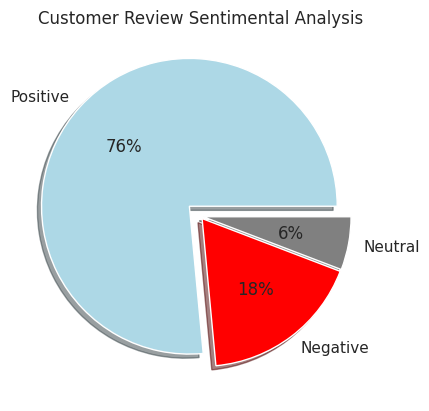

In [98]:
# visualize the data distribution of sentiment through pie chart
data = rev_df['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment', 'Sentiment':'Count'})
plt.pie(data['Count'].values, autopct='%.0f%%',shadow=True, labels = data['Sentiment'], colors = ['lightblue','red', 'grey'], explode = [0.1,0.02,0.02])
plt.title('Customer Review Sentimental Analysis')
plt.show()

In [99]:
# plot the polarity and subjectivity
fig = px.scatter(rev_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Sentiment',
                 size='Subjectivity')

#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])

fig.show()

In [100]:
# converting Sentiment Column values in numeric where Positive and Neutral == 1 and Negative == 0
rev_df['Sentiment'] = np.where(rev_df['Sentiment'] == 'Positive', 1, np.where(rev_df['Sentiment'] == "Negative", 0, 1))

In [101]:
rev_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen da arun great guy behavior sincerety go...     5.0   
4  food goodwe ordered kodi drumstick basket mutt...     5.0   

                  Metadata                Time  Pictures  Review_year  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0       2019.0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0       2019.0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0       2019.0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0       2019.0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0       2019.0   

   Review_months  Review_hour  Reviewer_total_review  \
0            5.0         15.0                    1.0   
1            5.0         14.0                    3.0   
2            5.0         22.0                    2.0   
3            5.0         22.0                    1.0   
4            5.0         21.0                    3.0   

   Reviewer_total_followers  Subjectivity  Polarity  Sentiment  
0                       2.0      0.720000  0.660000          1  
1                       2.0      0.691667  0.708333          1  
2                       3.0      0.675000  0.550000          1  
3                       1.0      0.675000  0.750000          1  
4                       2.0      0.525000  0.525000          1

#### 2. Feature Selection

In [102]:
# Select your features wisely to perform clustering
cluster_df = pd.concat([cluster_df[['Restaurant','Cost','Avg Rating']], pd.DataFrame(vector_df.toarray(), columns=vectorizer.get_feature_names_out())], axis = 1)
cluster_df

Restaurant    Cost  Avg Rating  american  andhra  \
0                   Beyond Flavours   800.0       4.280         0       0   
1                          Paradise   800.0       4.700         0       0   
2                          Flechazo  1300.0       4.660         0       0   
3    Shah Ghouse Hotel & Restaurant   800.0       3.210         0       0   
4        Over The Moon Brew Company  1200.0       4.340         0       0   
..                              ...     ...         ...       ...     ...   
95                       Desi Bytes   400.0       2.900         0       0   
96                Hyderabadi Daawat   600.0       3.830         0       0   
97  Zega - Sheraton Hyderabad Hotel  1750.0       4.450         0       0   
98                         Triptify   400.0       3.550         0       0   
99                 Chinese Pavilion  1000.0       3.745         0       0   

    arabian  asian  bakery  bbq  beverages  ...  northindian  pizza  salad  \
0         0      0       0    0          0  ...            1      0      0   
1         0      0       0    0          0  ...            1      0      0   
2         0      1       0    0          0  ...            1      0      0   
3         0      0       0    0          1  ...            1      0      0   
4         0      1       0    0          0  ...            1      0      0   
..      ...    ...     ...  ...        ...  ...          ...    ...    ...   
95        0      0       0    0          0  ...            1      0      0   
96        0      0       0    0          0  ...            0      0      0   
97        0      1       0    0          0  ...            0      0      0   
98        0      0       0    0          0  ...            1      0      0   
99        0      0       0    0          0  ...            0      0      0   

    seafood  southindian  spanish  streetfood  sushi  thai  wraps  
0         0            1        0           0      0     0      0  
1         0            0        0           0      0     0      0  
2         0            0        0           0      0     0      0  
3         1            0        0           0      0     0      0  
4         0            0        0           0      0     0      0  
..      ...          ...      ...         ...    ...   ...    ...  
95        0            0        0           0      0     0      0  
96        0            0        0           0      0     0      0  
97        0            0        0           0      1     0      0  
98        0            0        0           0      0     0      0  
99        1            0        0           0      0     0      0  

[100 rows x 45 columns]

In [103]:
# Select your features wisely to perform sentimental Analysis
sentimental_df = rev_df[['Restaurant','Rating','Reviewer','Review','Sentiment']]
sentimental_df

Restaurant  Rating              Reviewer  \
0      Beyond Flavours     5.0     Rusha Chakraborty   
1      Beyond Flavours     5.0  Anusha Tirumalaneedi   
2      Beyond Flavours     5.0       Ashok Shekhawat   
3      Beyond Flavours     5.0        Swapnil Sarkar   
4      Beyond Flavours     5.0                Dileep   
...                ...     ...                   ...   
9995  Chinese Pavilion     3.0      Abhishek Mahajan   
9996  Chinese Pavilion     4.5        Sharad Agrawal   
9997  Chinese Pavilion     1.5             Ramandeep   
9998  Chinese Pavilion     4.0       Nayana Shanbhag   
9999  Chinese Pavilion     3.5      Bhargava Krishna   

                                                 Review  Sentiment  
0     ambience good food quite good saturday lunch c...          1  
1     ambience good pleasant evening service prompt ...          1  
2     must try great food great ambience thnx servic...          1  
3     soumen da arun great guy behavior sincerety go...          1  
4     food goodwe ordered kodi drumstick basket mutt...          1  
...                                                 ...        ...  
9995  madhumathi mahajan well start nice courteous s...          1  
9996  place never disappointed u food courteous staf...          1  
9997  bad rating mainly chicken bone found veg food ...          1  
9998  personally love prefer chinese food couple tim...          1  
9999  checked try delicious chinese food seen nonveg...          1  

[9962 rows x 5 columns]

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [104]:
#using log10 transformation to transform Cost column
cluster_df['Cost'] = np.log10(cluster_df['Cost'])

<Axes: xlabel='Cost', ylabel='Density'>

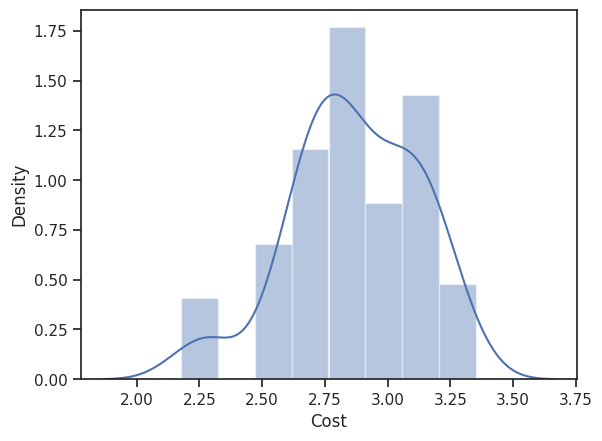

In [105]:
sns.distplot(cluster_df['Cost'])

### 6. Data Scaling

In [106]:
# Scaling your data
numerical_cols = ['Cost','Avg Rating']
scaler = StandardScaler()
scaler.fit(cluster_df[numerical_cols])
cluster_df[numerical_cols] = scaler.transform(cluster_df[numerical_cols])
cluster_df.head()

Restaurant      Cost  Avg Rating  american  andhra  \
0                 Beyond Flavours  0.143043    1.340251         0       0   
1                        Paradise  0.143043    2.171374         0       0   
2                        Flechazo  0.959069    2.092219         0       0   
3  Shah Ghouse Hotel & Restaurant  0.143043   -0.777133         0       0   
4      Over The Moon Brew Company  0.824536    1.458983         0       0   

   arabian  asian  bakery  bbq  beverages  ...  northindian  pizza  salad  \
0        0      0       0    0          0  ...            1      0      0   
1        0      0       0    0          0  ...            1      0      0   
2        0      1       0    0          0  ...            1      0      0   
3        0      0       0    0          1  ...            1      0      0   
4        0      1       0    0          0  ...            1      0      0   

   seafood  southindian  spanish  streetfood  sushi  thai  wraps  
0        0            1        0           0      0     0      0  
1        0            0        0           0      0     0      0  
2        0            0        0           0      0     0      0  
3        1            0        0           0      0     0      0  
4        0            0        0           0      0     0      0  

[5 rows x 45 columns]

### 7. Dimesionality Reduction

In [107]:
# DImensionality Reduction using PCA
features = cluster_df.drop(columns = 'Restaurant')
pca = PCA()

# fitting pca on features
pca.fit(features)

PCA()

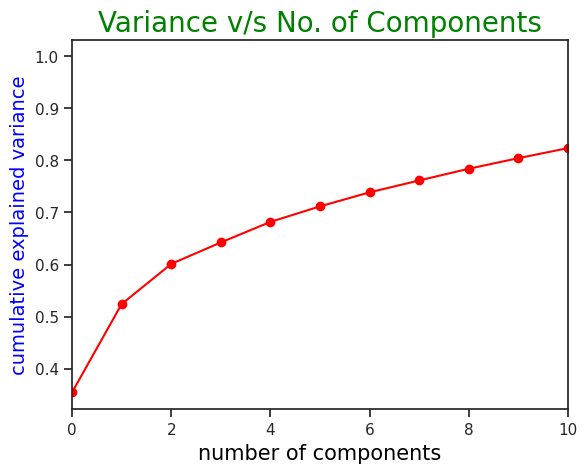

In [108]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'red')
plt.xlabel('number of components',size = 15, color = 'black')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 10])
plt.show()

In [109]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(features)

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(features)

Explained variation per principal component: [0.35404736 0.1697979  0.07731235]
Cumulative variance explained by 3 principal components: 60.12%


In [110]:
#shape
print("original shape: ", cluster_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 45)
transformed shape: (100, 3)


In [111]:
df_pca[:5]

array([[-1.18361955,  0.41510223,  1.05709023],
       [-1.455851  ,  0.94247944,  1.48933351],
       [-2.17967828,  1.09760079,  0.2062143 ],
       [ 0.48486902, -1.00292905,  0.51508601],
       [-1.83754057,  0.1706581 ,  0.5601915 ]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I employed PCA as a technique for reducing dimensions. PCA, or Principal Component Analysis, is a prevalent method for dimensionality reduction due to its capability to uncover dominant patterns in data that contribute significantly to its variability. These key patterns, termed principal components, are combinations of the original features that are mutually uncorrelated. Utilizing the initial principal components, which capture the majority of data variability, allows effective reduction of data dimensions while retaining critical information.

### 8. Data Splitting

In [112]:
# Vectorizing Text
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentimental_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentimental_df['Review'].values)

In [113]:
# creating independent variable and dependent variable.
x = X_tfidf
y = sentimental_df['Sentiment']

In [114]:
# Split your data to train and test. Choose Splitting ratio 20%.
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 108)

In [115]:
# checking the value count and proportion of class in y_train
print('Value Count: \n' , y_train.value_counts())
print('Proportion: \n', 1400/(1400+6569))

Value Count: 
 1    6579
0    1390
Name: Sentiment, dtype: int64
Proportion: 
 0.17568076295645627


In [116]:
# checking the value count and proportion of class in y_test
print('Value Count: \n' , y_test.value_counts())
print('Proportion: \n', 363/(363+1630))

Value Count: 
 1    1620
0     373
Name: Sentiment, dtype: int64
Proportion: 
 0.1821374811841445


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

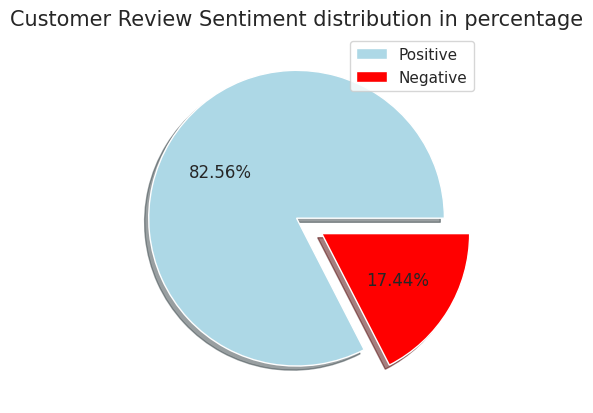

In [117]:
# visulizing the distribution of data in sentimental Analysis
data1 = y_train.value_counts()
plt.pie(data1, explode = [0,0.2], autopct='%0.2f%%', shadow=True, colors = ['lightblue','red'])
plt.title('Customer Review Sentiment distribution in percentage',fontsize =15)
plt.legend(['Positive','Negative'])
plt.show()

In [118]:
# Handling Imbalanced Dataset through SMOTE
from imblearn.over_sampling import SMOTE
x_smote, y_smote = SMOTE(random_state = 3).fit_resample(x_train, y_train)

# checking the count of y variable before and after appling SMOTE
print('Original training dataset count: \n', y.value_counts())
print('Resampled training dataset count: \n', y_smote.value_counts())

Original training dataset count: 
 1    8199
0    1763
Name: Sentiment, dtype: int64
Resampled training dataset count: 
 1    6579
0    6579
Name: Sentiment, dtype: int64


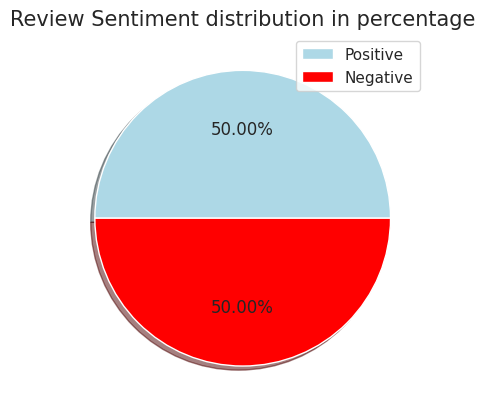

In [119]:
# visulizing the distribution of data in sentimental Analysis after applying SMOTE
data2 = y_smote.value_counts()
plt.pie(data2, autopct='%0.2f%%', shadow=True, colors = ['lightblue','red'])
plt.title('Review Sentiment distribution in percentage',fontsize =15)
plt.legend(['Positive','Negative'])
plt.show()

### 10. Creating Functions for checking performance of model

In [120]:
# function for evolution matrice
def matrix(model,x_train,x_test,y_train,y_test):

  # train pediction
  train_pred = model.predict(x_train)

  # test prediction
  test_pred = model.predict(x_test)


  # creating dataframe to store value of matrix
  test_df = pd.DataFrame()
  train_df = pd.DataFrame()

  # calculating recall, roc_auc, f1_score for training dataset
  train_precision = round(precision_score(y_train,train_pred),2)
  train_recall = round(recall_score(y_train,train_pred, average='binary'),2)
  train_roc_auc_score = round(roc_auc_score(y_train, train_pred),2)
  train_f1_score = round(f1_score(y_train, train_pred),2)

  # creating dict of all matrics values for test datasets
  train_metrics = {
              'Model': model,
              'Precision' : train_precision,
              'Recall': train_recall,
              'AUC_ROC': train_roc_auc_score,
              'F1_Score': train_f1_score,
              }

   # storing the value in dataframe
  train_df = train_df.append(train_metrics, ignore_index=True)

  # calculating recall, roc_auc, f1_score for training dataset
  test_precision = round(precision_score(y_test,test_pred),2)
  test_recall = round(recall_score(y_test,test_pred, average='binary'),2)
  test_roc_auc_score = round(roc_auc_score(y_test, test_pred),2)
  test_f1_score = round(f1_score(y_test, test_pred),2)

  # creating dict of all matrics values for test datasets
  test_metrics = {
              'Model': model,
              'Precision' : test_precision,
              'Recall': test_recall,
              'AUC_ROC': test_roc_auc_score,
              'F1_Score': test_f1_score,
              }

  # storing the value in dataframe
  test_df = test_df.append(test_metrics, ignore_index=True)

  # concatenating both the dataframe in single dataframe
  result=pd.concat([train_df,test_df],keys=['Training set','Test set'])

  return result

In [121]:
# function for getting confusion matrix and classification report
def confusion_classification(model,x_train,x_test,y_train,y_test):

  # test prediction
  y_pred_te = model.predict(x_test)

  # classification report
  print(classification_report(y_test,y_pred_te))

  # confusion matrix
  confusion_matrix = cm(y_test, y_pred_te)
  cm_display = cmd(confusion_matrix = confusion_matrix, display_labels = [False, True])

  # visualization of confusion matrix
  cm_display.plot(cmap='Blues')
  plt.title(f'Confusion matrix: {model}')
  plt.show();

## ***7. ML Model Implementation***

### <font color = 'blue'> **Sentimental Analysis Model**

### ML Model - 1 : MuitinomialNB

In [122]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
mnb = MultinomialNB()

mnb.fit(x_smote, y_smote)

MultinomialNB()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [123]:
# Evaluating model through different matrix
mnb_score = matrix(mnb,x_smote,x_test,y_smote,y_test)
mnb_score

Model  Precision  Recall  AUC_ROC  F1_Score
Training set 0  MultinomialNB()       0.78    0.44     0.66      0.56
Test set     0  MultinomialNB()       0.91    0.45     0.63      0.60

              precision    recall  f1-score   support

           0       0.25      0.82      0.39       373
           1       0.91      0.45      0.60      1620

    accuracy                           0.52      1993
   macro avg       0.58      0.63      0.49      1993
weighted avg       0.79      0.52      0.56      1993



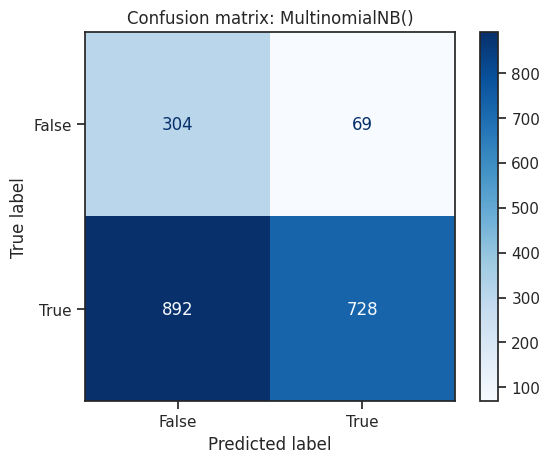

In [124]:
# Visualizing evaluation Metric Score chart through confusion matrix and classification report
confusion_classification(mnb,x_smote,x_test,y_smote,y_test)

### ML Model - 2 : Random Forest

In [125]:
# Traing Random Forest Model
rf= RandomForestClassifier().fit(x_smote, y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [126]:
# Evaluating model through different matrix
rf_score = matrix(rf,x_smote,x_test,y_smote,y_test)
rf_score

Model  Precision  \
Training set 0  (DecisionTreeClassifier(max_features='sqrt', r...       1.00   
Test set     0  (DecisionTreeClassifier(max_features='sqrt', r...       0.86   

                Recall  AUC_ROC  F1_Score  
Training set 0    1.00     1.00      1.00  
Test set     0    0.89     0.63      0.88

              precision    recall  f1-score   support

           0       0.44      0.36      0.40       373
           1       0.86      0.89      0.88      1620

    accuracy                           0.79      1993
   macro avg       0.65      0.63      0.64      1993
weighted avg       0.78      0.79      0.79      1993



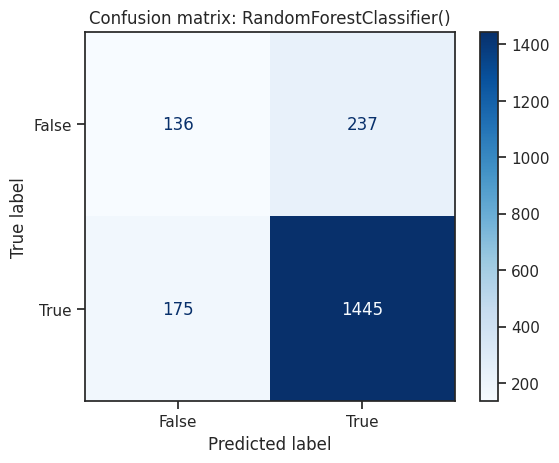

In [127]:
# Visualizing evaluation Metric Score chart through confusion matrix and classification report
confusion_classification(rf,x_smote,x_test,y_smote,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# Using GridSearchCV to improve the model
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfcv = GridSearchCV(estimator=rf,param_grid = param, scoring='recall',cv=5).fit(x_smote,y_smote)

In [129]:
# Evaluating model through different matrix
rfcv_score = matrix(rfcv,x_smote,x_test,y_smote,y_test)
rfcv_score

Model  Precision  \
Training set 0  GridSearchCV(cv=5, estimator=RandomForestClass...       0.99   
Test set     0  GridSearchCV(cv=5, estimator=RandomForestClass...       0.88   

                Recall  AUC_ROC  F1_Score  
Training set 0    0.91     0.95      0.95  
Test set     0    0.81     0.67      0.84

              precision    recall  f1-score   support

           0       0.39      0.52      0.45       373
           1       0.88      0.81      0.84      1620

    accuracy                           0.76      1993
   macro avg       0.63      0.67      0.64      1993
weighted avg       0.79      0.76      0.77      1993



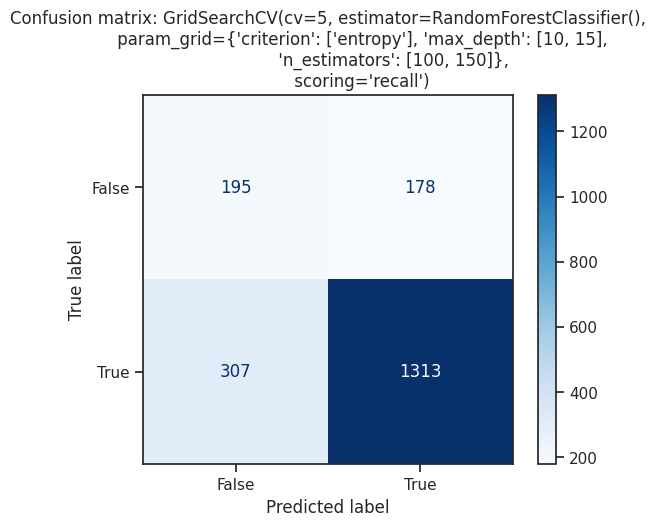

In [130]:
# Visualizing evaluation Metric Score chart through confusion matrix and classification report
confusion_classification(rfcv,x_smote,x_test,y_smote,y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [131]:
# concate two df rf_score and rfcv_score for compairsion
RF_score = pd.concat([rf_score,rfcv_score], keys = ['RandomForest', 'RandomForest with GridSearchCV']).drop(columns = 'Model')
RF_score

Precision  Recall  AUC_ROC  \
RandomForest                   Training set 0       1.00    1.00     1.00   
                               Test set     0       0.86    0.89     0.63   
RandomForest with GridSearchCV Training set 0       0.99    0.91     0.95   
                               Test set     0       0.88    0.81     0.67   

                                               F1_Score  
RandomForest                   Training set 0      1.00  
                               Test set     0      0.88  
RandomForest with GridSearchCV Training set 0      0.95  
                               Test set     0      0.84

* **Yes, after using GridSearchCV Overfitting has reduces**.

### ML Model - 3 : XGBoost Classifier

In [132]:
# Training XGBoost model
xgbc=XGBClassifier().fit(x_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [133]:
# Evaluating model through different matrix
xgbc_score = matrix(xgbc,x_smote,x_test,y_smote,y_test)
xgbc_score

Model  Precision  \
Training set 0  XGBClassifier(base_score=None, booster=None, c...       0.97   
Test set     0  XGBClassifier(base_score=None, booster=None, c...       0.88   

                Recall  AUC_ROC  F1_Score  
Training set 0    0.97     0.97      0.97  
Test set     0    0.87     0.67      0.87

              precision    recall  f1-score   support

           0       0.45      0.46      0.46       373
           1       0.88      0.87      0.87      1620

    accuracy                           0.79      1993
   macro avg       0.66      0.67      0.67      1993
weighted avg       0.80      0.79      0.80      1993



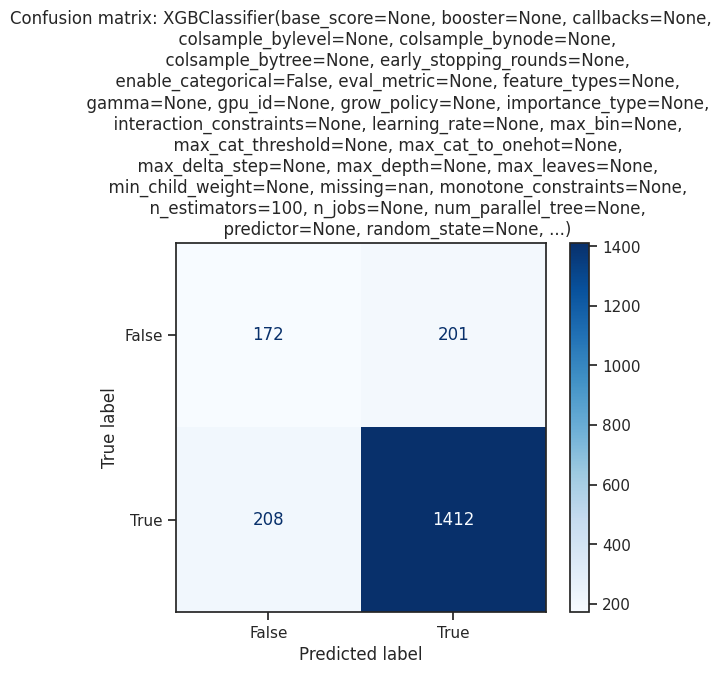

In [134]:
# Visualizing evaluation Metric Score chart through confusion matrix and classification report
confusion_classification(xgbc,x_smote,x_test,y_smote,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [135]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# finding the best parameters for XGBRegressor by gridsearchcv
param={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
xgbccv = GridSearchCV(estimator=xgbc, param_grid=param, cv=3, scoring='recall').fit(x_smote, y_smote)

In [136]:
# Evaluating model through different matrix
xgbcv_score = matrix(xgbccv,x_smote,x_test,y_smote,y_test)
xgbcv_score

Model  Precision  \
Training set 0  GridSearchCV(cv=3,\n             estimator=XGB...       1.00   
Test set     0  GridSearchCV(cv=3,\n             estimator=XGB...       0.87   

                Recall  AUC_ROC  F1_Score  
Training set 0     1.0     1.00      1.00  
Test set     0     0.9     0.65      0.88

              precision    recall  f1-score   support

           0       0.47      0.40      0.43       373
           1       0.87      0.90      0.88      1620

    accuracy                           0.80      1993
   macro avg       0.67      0.65      0.66      1993
weighted avg       0.79      0.80      0.80      1993



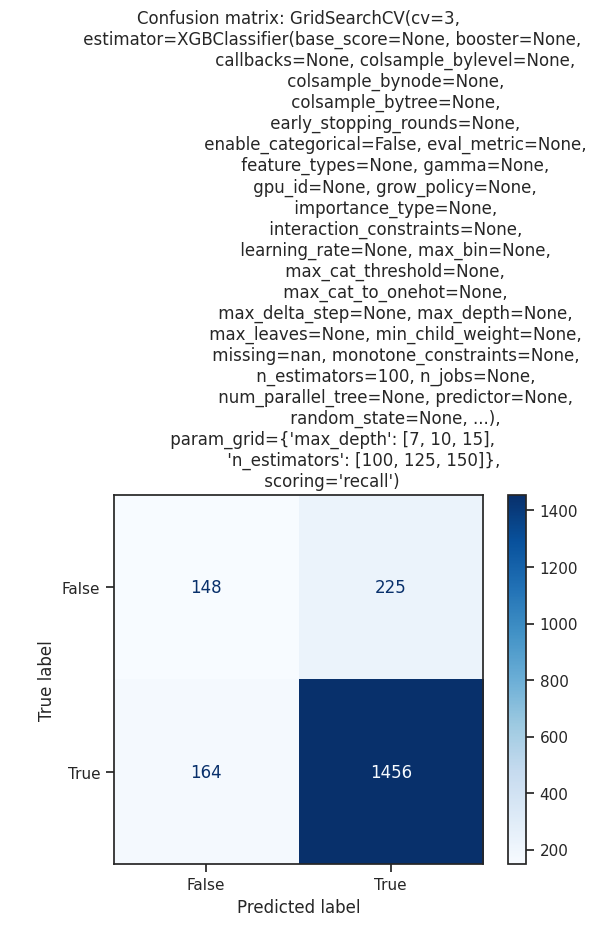

In [137]:
# Visualizing evaluation Metric Score chart through confusion matrix and classification report
confusion_classification(xgbccv,x_smote,x_test,y_smote,y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [138]:
# concate two df xgbc_score and xgbcv_score for compairsion
XGB_score = pd.concat([xgbc_score,xgbcv_score], keys = ['XGBoost', 'XGBoost with GridSearchCV']).drop(columns = 'Model')
XGB_score

Precision  Recall  AUC_ROC  F1_Score
XGBoost                   Training set 0       0.97    0.97     0.97      0.97
                          Test set     0       0.88    0.87     0.67      0.87
XGBoost with GridSearchCV Training set 0       1.00    1.00     1.00      1.00
                          Test set     0       0.87    0.90     0.65      0.88

* No, after using GridSearchCV we can see overfitting in our model.
* **Base XGBoost model is performing well compare to XGBoost with GridSearchCV**.

### ML Model - 4 : SVC

In [139]:
#  Training SVC model
SVMc = SVC().fit(x_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [140]:
# Evaluating model through different matrix
svm_score = matrix(SVMc,x_smote,x_test,y_smote,y_test)
svm_score

Model  Precision  Recall  AUC_ROC  F1_Score
Training set 0  SVC()       0.82    0.72     0.78      0.76
Test set     0  SVC()       0.91    0.72     0.71      0.81

              precision    recall  f1-score   support

           0       0.37      0.70      0.48       373
           1       0.91      0.72      0.81      1620

    accuracy                           0.72      1993
   macro avg       0.64      0.71      0.65      1993
weighted avg       0.81      0.72      0.75      1993



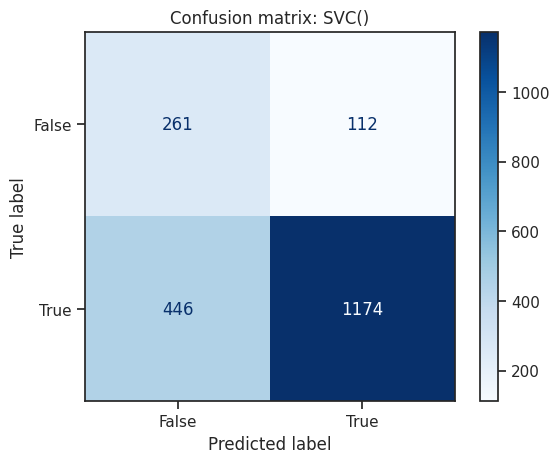

In [141]:
# Visualizing evaluation Metric Score chart through confusion matrix and classification report
confusion_classification(SVMc,x_smote,x_test,y_smote,y_test)

### <font color = 'blue'> **Restaurant Clustering**

### ML Model - 1 - KMeans

In [142]:
# Training KMeans
sse = []
for i in range(1,11):
  km = KMeans(n_clusters = i, random_state = 9)
  km.fit(df_pca)
  sse.append(km.inertia_)

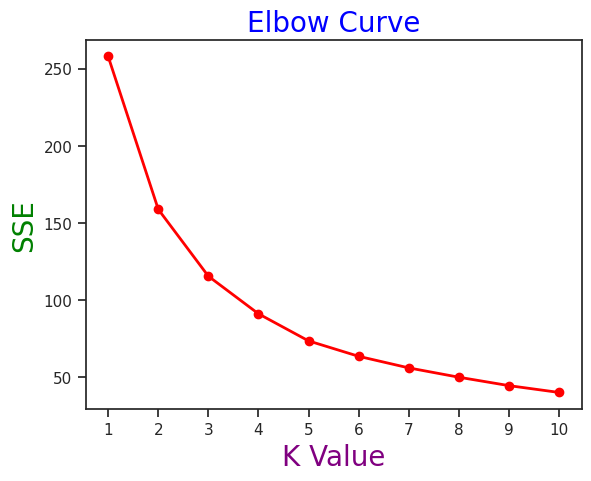

In [143]:
# plotting elbow curve
plt.plot(range(1,11),sse, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.32509056453157403
For n_clusters = 3 average silhouette_score is : 0.31784593139500883
For n_clusters = 4 average silhouette_score is : 0.3243825559501409
For n_clusters = 5 average silhouette_score is : 0.30871132776921
For n_clusters = 6 average silhouette_score is : 0.30655384003272185
For n_clusters = 7 average silhouette_score is : 0.3233819162530351
For n_clusters = 8 average silhouette_score is : 0.30676119956449527
For n_clusters = 9 average silhouette_score is : 0.3080554669388043


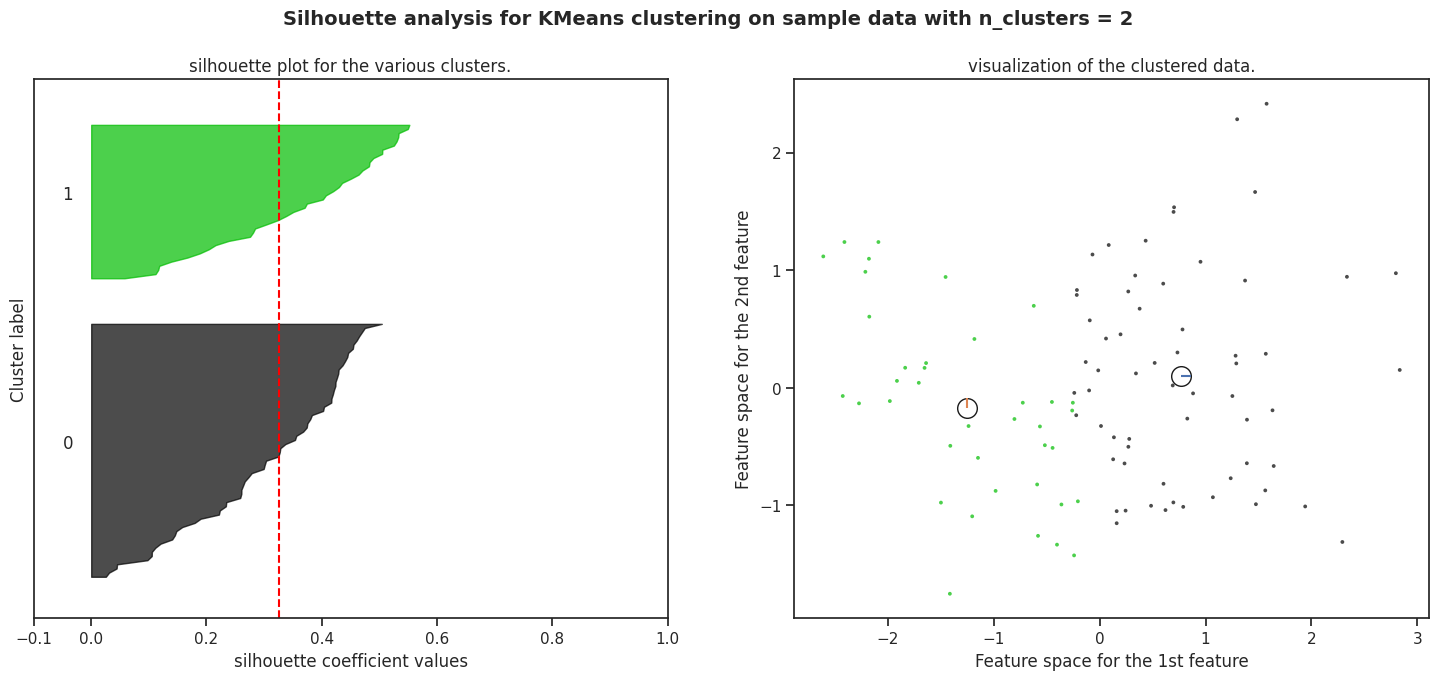

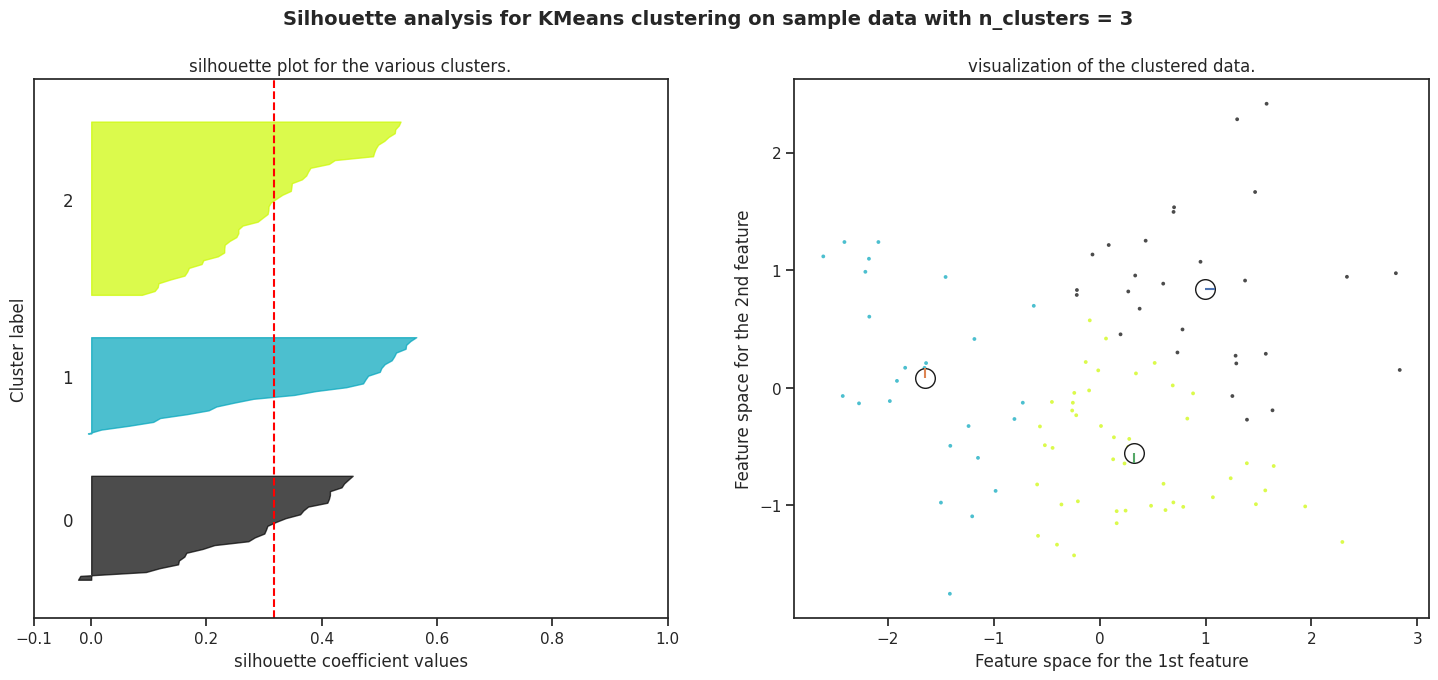

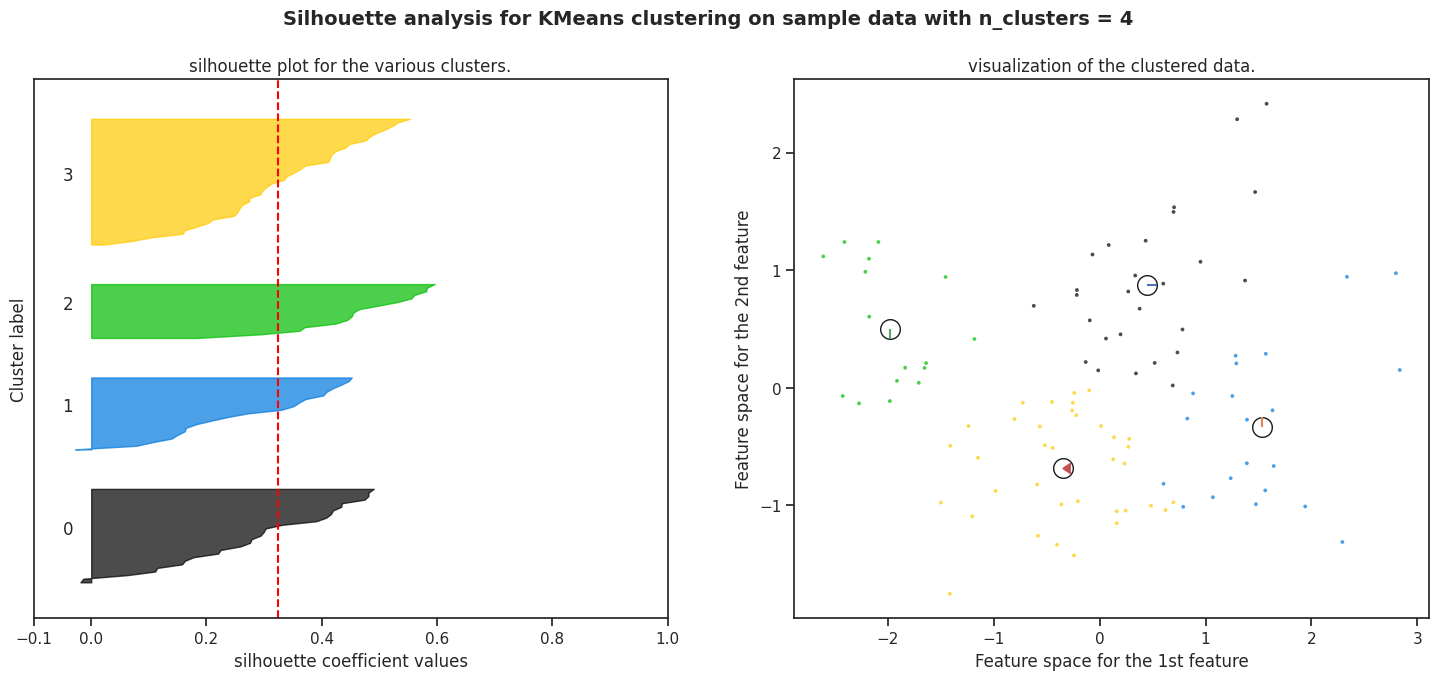

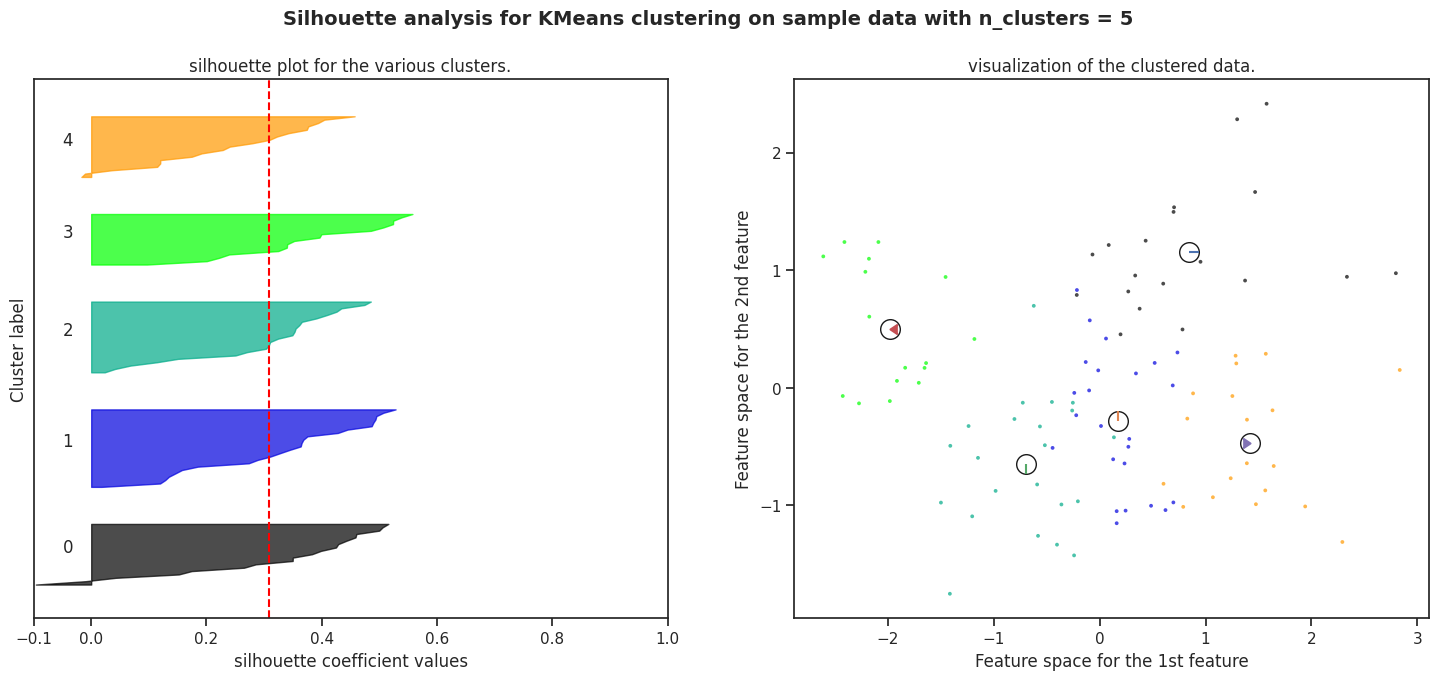

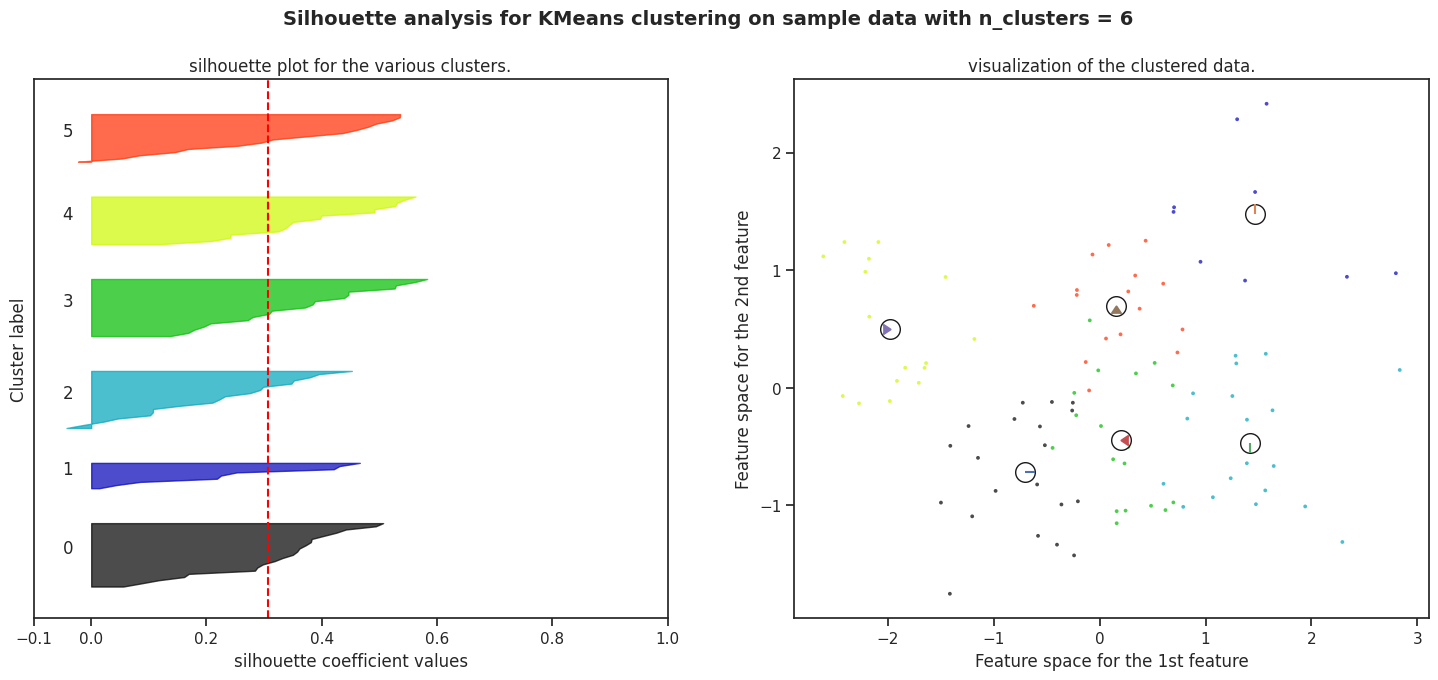

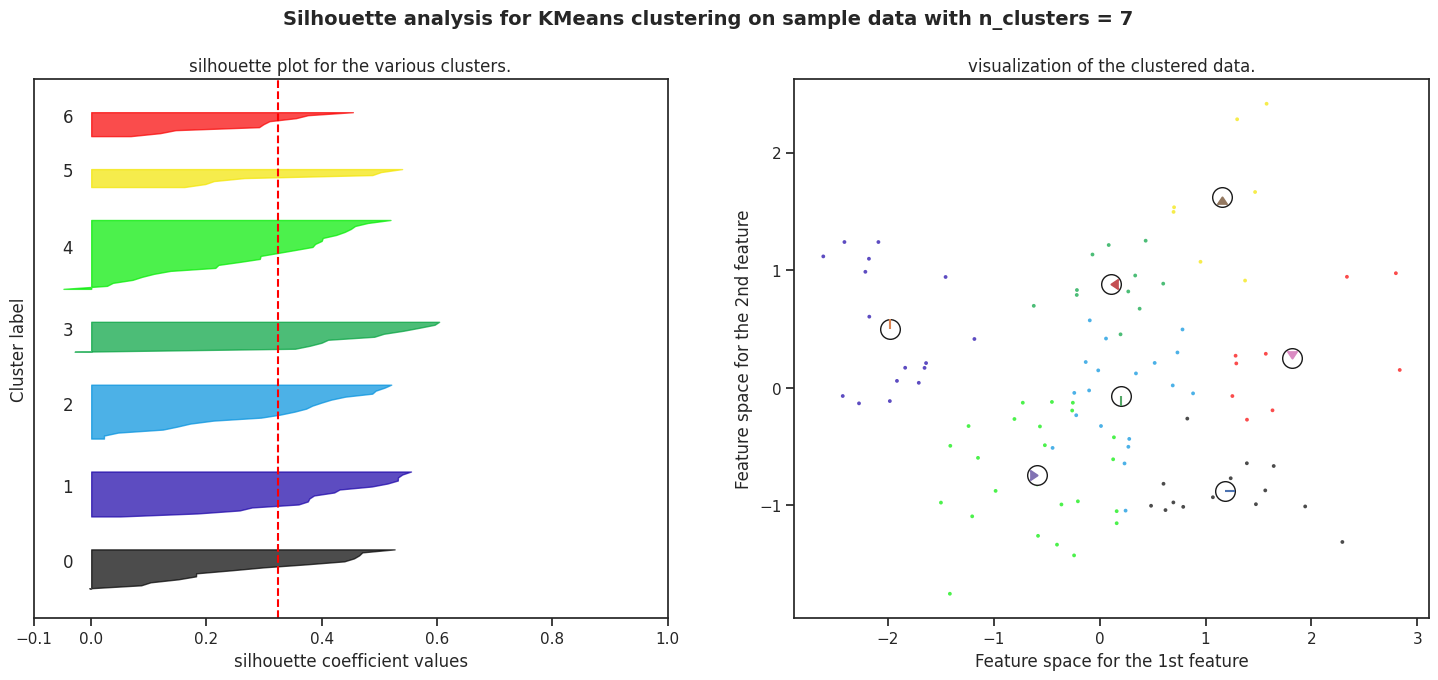

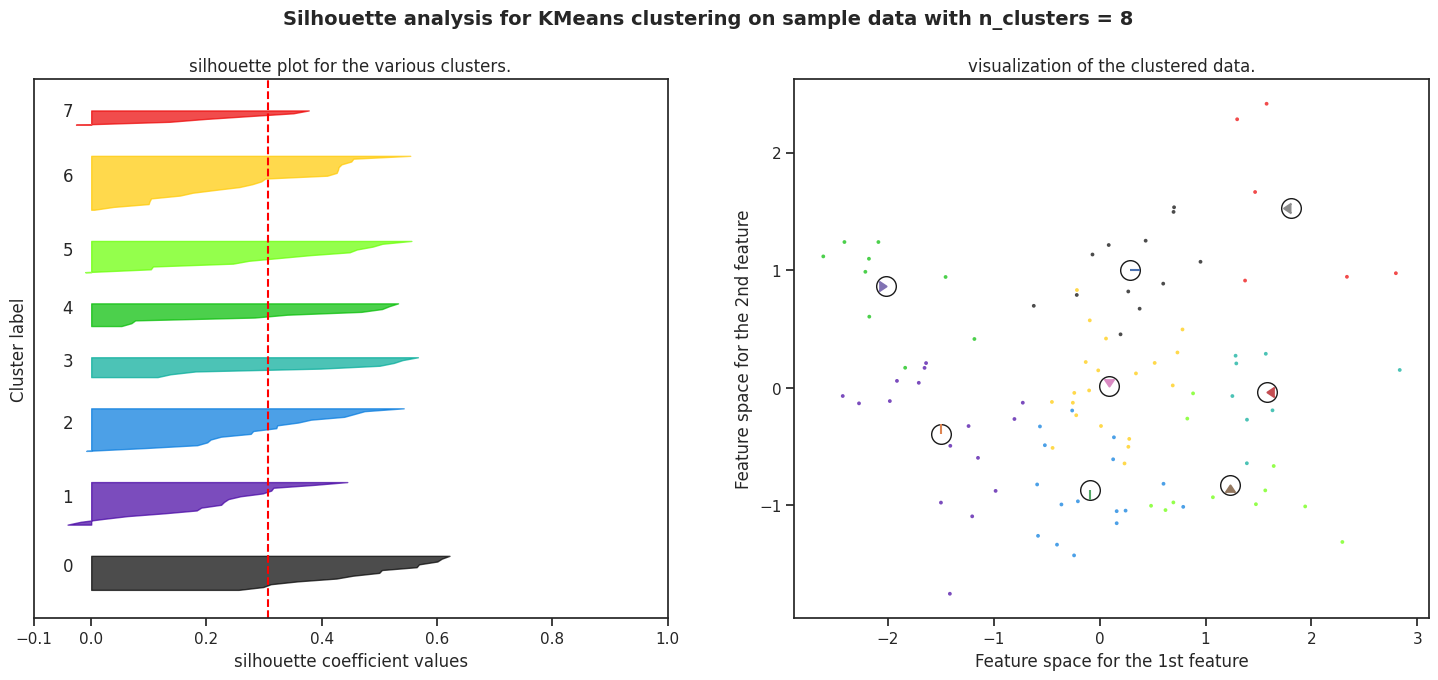

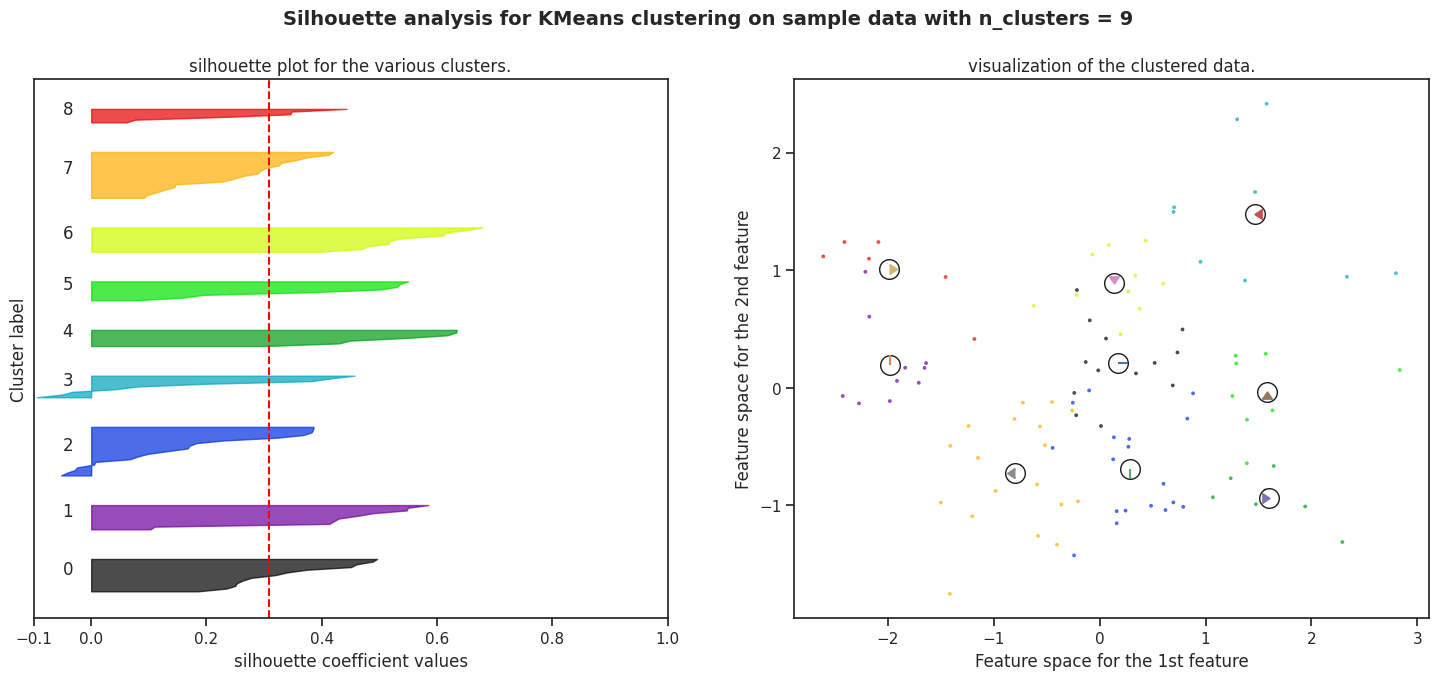

In [144]:
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_blobs
from matplotlib import cm
from itertools import cycle

# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    #marker='' % i will give numer in cluster in 2 plot
    markers = list(range(1,12))
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = markers[i], alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

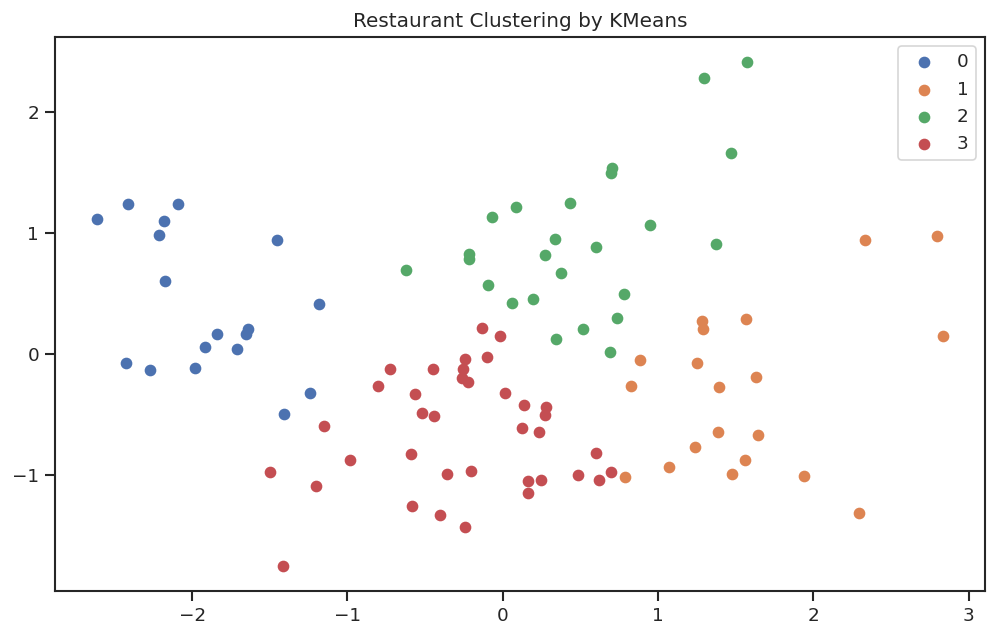

In [145]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 4, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the number of clusters.
clusters = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(clusters)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[clusters == i , 0] , df_pca[clusters == i , 1] , label = i)
plt.legend()
plt.title('Restaurant Clustering by KMeans')
plt.show()


In [146]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=cluster_df.index)
kmeans_pca_df["label"] = clusters
kmeans_pca_df.head()

PC1       PC2       PC3  label
0 -1.183620  0.415102  1.057090      0
1 -1.455851  0.942479  1.489334      0
2 -2.179678  1.097601  0.206214      0
3  0.484869 -1.002929  0.515086      3
4 -1.837541  0.170658  0.560192      0

In [147]:
# Adding Label Columns in cluster_df
cluster_df['kmeans_label'] = clusters
cluster_df.head()

Restaurant      Cost  Avg Rating  american  andhra  \
0                 Beyond Flavours  0.143043    1.340251         0       0   
1                        Paradise  0.143043    2.171374         0       0   
2                        Flechazo  0.959069    2.092219         0       0   
3  Shah Ghouse Hotel & Restaurant  0.143043   -0.777133         0       0   
4      Over The Moon Brew Company  0.824536    1.458983         0       0   

   arabian  asian  bakery  bbq  beverages  ...  pizza  salad  seafood  \
0        0      0       0    0          0  ...      0      0        0   
1        0      0       0    0          0  ...      0      0        0   
2        0      1       0    0          0  ...      0      0        0   
3        0      0       0    0          1  ...      0      0        1   
4        0      1       0    0          0  ...      0      0        0   

   southindian  spanish  streetfood  sushi  thai  wraps  kmeans_label  
0            1        0           0      0     0      0             0  
1            0        0           0      0     0      0             0  
2            0        0           0      0     0      0             0  
3            0        0           0      0     0      0             3  
4            0        0           0      0     0      0             0  

[5 rows x 46 columns]

In [148]:
# creating new dataframe with the lable of cluster
cluster_result = rest_df[['Restaurant','Cuisines','Cost']].merge(cluster_df[['Restaurant','kmeans_label']], on = 'Restaurant')
cluster_result.head(10)

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   
5           The Fisherman's Wharf   
6                         eat.fit   
7        Shah Ghouse Spl Shawarma   
8                     Hyper Local   
9                     Cream Stone   

                                            Cuisines    Cost  kmeans_label  
0  Chinese, Continental, Kebab, European, South I...   800.0             0  
1                     Biryani, North Indian, Chinese   800.0             0  
2       Asian, Mediterranean, North Indian, Desserts  1300.0             0  
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0             3  
4  Asian, Continental, North Indian, Chinese, Med...  1200.0             0  
5    Seafood, Goan, North Indian, Continental, Asian  1500.0             0  
6  Healthy Food, North Indian, Continental, South...   500.0             1  
7                                           Lebanese   300.0             2  
8  American, Chinese, North Indian, Kebab, South ...  1000.0             3  
9                                Ice Cream, Desserts   350.0             2

<Axes: xlabel='kmeans_label', ylabel='count'>

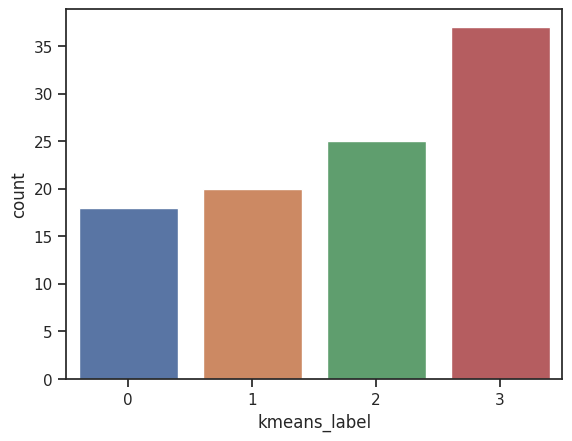

In [149]:
# visualizing the count of each labels
sns.countplot(x = 'kmeans_label', data = cluster_result)

In [150]:
# creating list of restaurant for each labels
k_cluster_0 = list(cluster_result[cluster_result['kmeans_label'] == 0]['Restaurant'])
k_cluster_1 = list(cluster_result[cluster_result['kmeans_label'] == 1]['Restaurant'])
k_cluster_2 = list(cluster_result[cluster_result['kmeans_label'] == 2]['Restaurant'])
k_cluster_3 = list(cluster_result[cluster_result['kmeans_label'] == 3]['Restaurant'])

In [151]:
print(k_cluster_0, '\n',k_cluster_1, '\n',k_cluster_2, '\n',k_cluster_3)

['Beyond Flavours', 'Paradise', 'Flechazo', 'Over The Moon Brew Company', "The Fisherman's Wharf", 'Barbeque Nation', "AB's - Absolute Barbecues", 'B-Dubs', "3B's - Buddies, Bar & Barbecue", 'Mazzo - Marriott Executive Apartments', 'The Glass Onion', 'Feast - Sheraton Hyderabad Hotel', 'Prism Club & Kitchen', 'The Tilt Bar Republic', 'The Indi Grill', 'Arena Eleven', 'Cascade - Radisson Hyderabad Hitec City', 'Zega - Sheraton Hyderabad Hotel'] 
 ['eat.fit', "Sardarji's Chaats & More", 'KFC', 'Hotel Zara Hi-Fi', 'Pakwaan Grand', 'Behrouz Biryani', 'Hunger Maggi Point', 'Club Rogue', 'Mathura Vilas', 'Hitech Bawarchi Food Zone', 'Asian Meal Box', 'Shree Santosh Dhaba Family Restaurant', 'Faasos', 'Tandoori Food Works', 'Delhi-39', 'The Chocolate Room', "Domino's Pizza", 'Mohammedia Shawarma', "Dunkin' Donuts", 'Desi Bytes'] 
 ['Shah Ghouse Spl Shawarma', 'Cream Stone', 'NorFest - The Dhaba', '13 Dhaba', 'Amul', 'Kritunga Restaurant', 'Deli 9 Bistro', 'Karachi Bakery', 'Karachi Cafe', 'Th

### ML Model - 2: Agglomerative Hierarchical Clustering

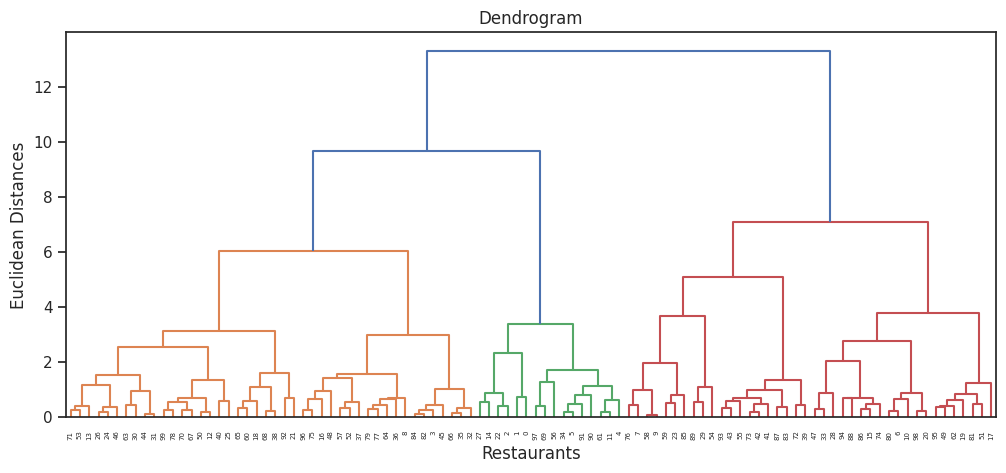

In [152]:
# importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

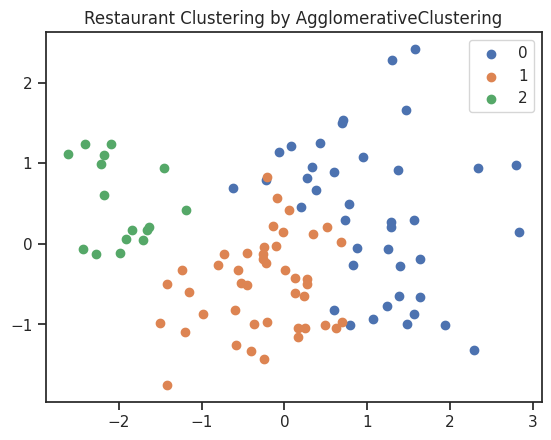

Silhouette Coefficient: 0.294


In [153]:
# define the model
ag = AgglomerativeClustering(n_clusters = 3)      #n_clusters=3
# fit model and predict clusters
y_hc = ag.fit_predict(df_pca)

# retrieve unique clusters
hr_clusters = np.unique(y_hc)

for i in hr_clusters:
    plt.scatter(df_pca[y_hc == i , 0] , df_pca[y_hc == i , 1] , label = i)
plt.legend()
plt.title('Restaurant Clustering by AgglomerativeClustering')
plt.show()

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

In [154]:
# adding a new colume showing the labels of cluster define by AgglomerativeClustering
cluster_result['hr_cluster'] = y_hc
cluster_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  kmeans_label  \
0  Chinese, Continental, Kebab, European, South I...   800.0             0   
1                     Biryani, North Indian, Chinese   800.0             0   
2       Asian, Mediterranean, North Indian, Desserts  1300.0             0   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0             3   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0             0   

   hr_cluster  
0           2  
1           2  
2           2  
3           1  
4           2

<Axes: xlabel='hr_cluster', ylabel='count'>

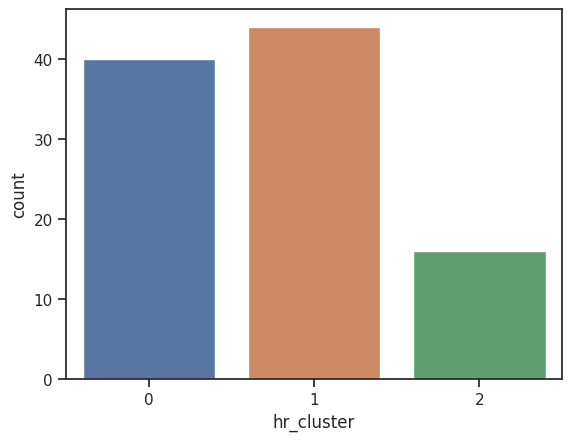

In [155]:
# Visualizing count of each labels
sns.countplot(x = 'hr_cluster', data = cluster_result)

In [156]:
# creating a list of restaurnt for each cluster
hr_cluster_0 = list(cluster_result[cluster_result['hr_cluster'] == 0]['Restaurant'])
hr_cluster_1 = list(cluster_result[cluster_result['hr_cluster'] == 1]['Restaurant'])
hr_cluster_3 = list(cluster_result[cluster_result['hr_cluster'] == 2]['Restaurant'])

In [157]:
print(hr_cluster_0, '\n',hr_cluster_1, '\n',hr_cluster_3)

['eat.fit', 'Shah Ghouse Spl Shawarma', 'Cream Stone', "Sardarji's Chaats & More", 'KFC', 'Hotel Zara Hi-Fi', 'Pakwaan Grand', '13 Dhaba', 'Amul', 'Behrouz Biryani', 'Hunger Maggi Point', 'Club Rogue', 'Deli 9 Bistro', 'Karachi Bakery', 'Karachi Cafe', 'The Foodie Monster Kitchen', 'Shanghai Chef 2', 'Mathura Vilas', 'Hitech Bawarchi Food Zone', 'Asian Meal Box', 'Cafe Eclat', 'Tempteys', 'KS Bakers', 'Shree Santosh Dhaba Family Restaurant', 'Labonel', 'Driven Cafe', 'Faasos', 'The Old Madras Baking Company', 'Tandoori Food Works', 'Delhi-39', "GD's", 'Momos Delight', 'The Chocolate Room', 'American Wild Wings', "Domino's Pizza", 'Mohammedia Shawarma', "Zing's Northeast Kitchen", "Dunkin' Donuts", 'Desi Bytes', 'Triptify'] 
 ['Shah Ghouse Hotel & Restaurant', 'Hyper Local', 'Absolute Sizzlers', 'The Lal Street - Bar Exchange', 'NorFest - The Dhaba', '10 Downing Street', "Jonathan's Kitchen - Holiday Inn Express & Suites", 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge', 'Pot Pourri', '

# **Conclusion**

## **<font color = 'red' > EDA Insight**

### **<font color = 'blue' > Highly Rated & Low Rated:**

* AB's - Absolute Barbecues and B-Dubs are top-rated.
* Shanghai Chef 2 and Hitech Bawarchi Food Zone have lower ratings.

### **<font color = 'blue' > Expensive & Affordable:**

* Collage, Feast-Sheraton Hyderabad Hotel, and 10 Downing Street are expensive.
* Mohammedia Shawarma, Amul, and KS Bakers are affordable.

### **<font color = 'blue' > Customer Sentiments:**

* Most customers rate Zomato restaurants with 4 to 5 stars.

### **<font color = 'blue' > Engagement Patterns and Review Times:**

* May and July see the highest reviews, while June has less engagement.
* Peak review posting time is 11 pm.

### **<font color = 'blue' > Common Review Keywords:**

* Customers commonly mention food, place, good, service, and taste.

### **<font color = 'blue' > Price Points:**

* AB's price: 1500, Zara Hi-Fi: 400.

### **<font color = 'blue' > Popular Cuisines & Tags:**

* North Indian and Chinese are top cuisines.
* "Great Buffets" is a common tag.

### **<font color = 'blue' > Top Reviewers and Influential Reviewers:**
* Anvesh Chowdary (3000+ reviews) and Raghu are top reviewers.
* Satwinder Singh has the most followers, followed by Foodies Hyderabad.


## **<font color = 'red' > Restaurant Clustering**

### **<font color = 'blue' > KMeans Clustering :**

**The Restaurants are clustered into 4 clusters** by using KMeans clustering alogirthm with the **Silhouette score of 0.324382**.

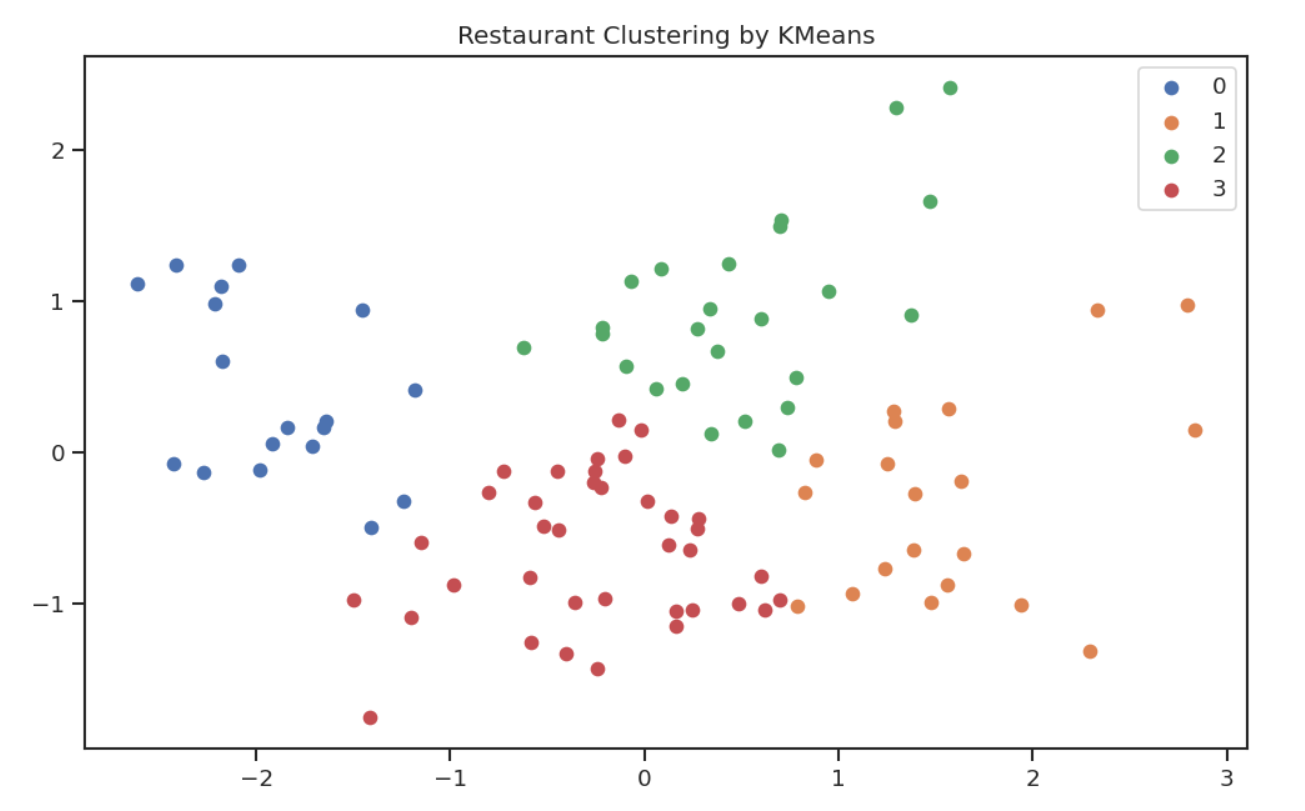


### **<font color = 'blue' > Agglomerative Clustering :**
**The Restaurants are clustered into 3 clusters** by using Agglomerative Clustering alogirthm with the **Silhouette score of 0.294.**

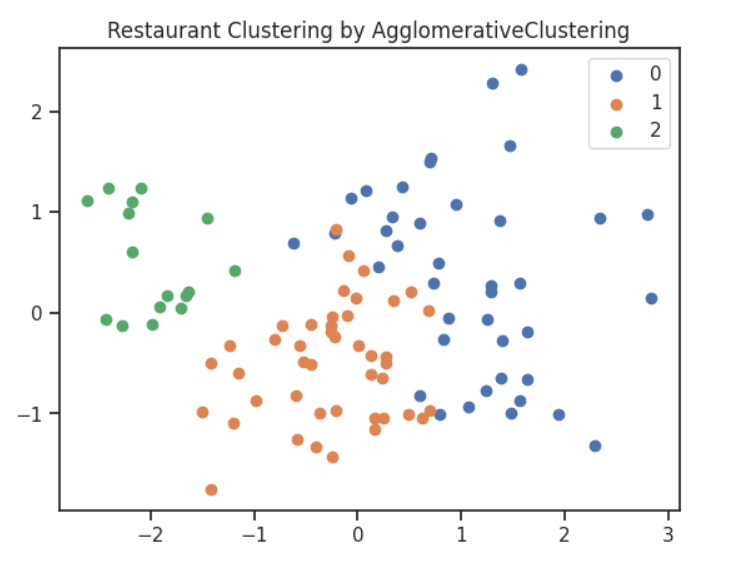




## **<font color = 'red' > Sentimental Analysis**
**Sentimental Analysis is to classify the review text as positive or negative.** This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

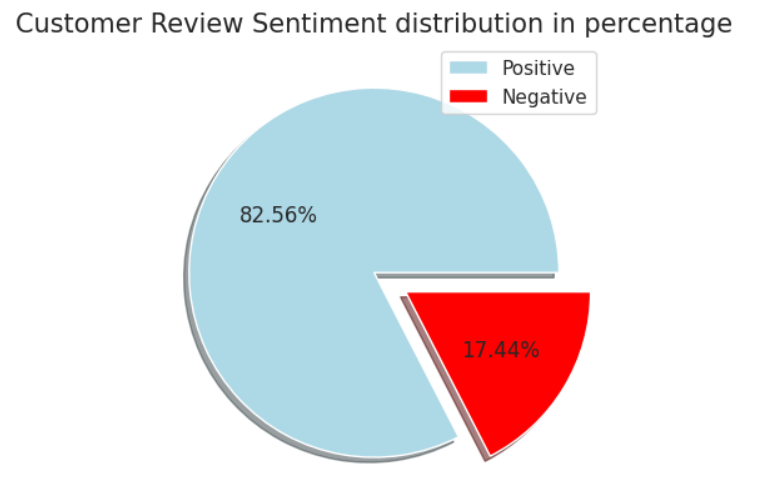

### **<font color = 'blue'> ML Model**

In [158]:
ML_resultdf = pd.concat([mnb_score, rf_score, rfcv_score, xgbc_score, xgbcv_score, svm_score], keys =['MuitinomialNB','RandomForest', 'RandomForest with GridSearchCV',
                                                                                                      'XGBoost', 'XGBoost with GridSearchCV', 'SVM'])
ML_resultdf.drop(columns = 'Model',inplace = True)
ML_resultdf

Precision  Recall  AUC_ROC  \
MuitinomialNB                  Training set 0       0.78    0.44     0.66   
                               Test set     0       0.91    0.45     0.63   
RandomForest                   Training set 0       1.00    1.00     1.00   
                               Test set     0       0.86    0.89     0.63   
RandomForest with GridSearchCV Training set 0       0.99    0.91     0.95   
                               Test set     0       0.88    0.81     0.67   
XGBoost                        Training set 0       0.97    0.97     0.97   
                               Test set     0       0.88    0.87     0.67   
XGBoost with GridSearchCV      Training set 0       1.00    1.00     1.00   
                               Test set     0       0.87    0.90     0.65   
SVM                            Training set 0       0.82    0.72     0.78   
                               Test set     0       0.91    0.72     0.71   

                                               F1_Score  
MuitinomialNB                  Training set 0      0.56  
                               Test set     0      0.60  
RandomForest                   Training set 0      1.00  
                               Test set     0      0.88  
RandomForest with GridSearchCV Training set 0      0.95  
                               Test set     0      0.84  
XGBoost                        Training set 0      0.97  
                               Test set     0      0.87  
XGBoost with GridSearchCV      Training set 0      1.00  
                               Test set     0      0.88  
SVM                            Training set 0      0.76  
                               Test set     0      0.81

* Among all the models, **XGBoost and RandomForest with GridSearchCV model shows the best performance with highest F1_score**.

* It outperforms the all other model.

* **No sign of overfitting seen**.

* Therefore, XGBoost and RandomForest with GridSearchCV is recommended as the top choice.

